# Assignment 1: Data Preprocessing & Exploratory Data Analysis (EDA)
# Machine Learning and Data Science - ENCS5341

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# --- Phase 1: Data Loading and Initial Inspection: ---


#### Phase 1: Data Loading and Initial Inspection

This section implements the first phase of the assignment where we:
1. Load the dataset into a pandas DataFrame
2. Display the first few rows using .head()
3. Check general information using .info()
4. Generate summary statistics using .describe()

**Note**: For this assignment, I've created a synthetic dataset that matches the specifications provided in the assignment requirements. In a real-world scenario, you would replace the data generation code with `pd.read_csv('customer_data.csv')`.

In [ ]:
# Loading the real customer data from CSV file


try:
    df = pd.read_csv('/content/customer_data.csv')
    print("✅ Dataset loaded successfully from customer_data.csv")

except FileNotFoundError:

    print("❌ customer_data.csv file not found")
    print("📁 Please ensure the file is in the same folder as the notebook")

    print("🔄 Creating sample data to continue...")

    np.random.seed(42)
    n_customers = 1000

    data = {
        'CustomerID': [f'CUST{str(i).zfill(4)}' for i in range(1, n_customers + 1)],
        'Age': np.random.randint(18, 80, n_customers),
        'Gender': np.random.choice([0, 1], n_customers),
        'Income': np.random.normal(50000, 20000, n_customers).round(2),
        'Tenure': np.random.randint(0, 20, n_customers),
        'ProductType': np.random.choice([0, 1], n_customers),
        'SupportCalls': np.random.poisson(3, n_customers),
        'ChurnStatus': np.random.choice([0, 1], n_customers, p=[0.7, 0.3])
    }

    df = pd.DataFrame(data)

    # إضافة بعض القيم المفقودة لمحاكاة البيانات الحقيقية
    missing_indices_income = np.random.choice(n_customers, 50, replace=False)
    missing_indices_age = np.random.choice(n_customers, 30, replace=False)

    df.loc[missing_indices_income, 'Income'] = np.nan
    df.loc[missing_indices_age, 'Age'] = np.nan

    print("✅ Sample dataset created successfully")

except Exception as e:
    print(f"❌ Error loading data: {e}")

print(f"\n📊 Dataset shape: {df.shape}")
print(f"📊 Number of rows: {df.shape[0]:,}")
print(f"📊 Number of columns): {df.shape[1]}")
print("📋 Data ready for analysis")

✅ Dataset loaded successfully from customer_data.csv

📊 Dataset shape: (3500, 8)
📊 Number of rows: 3,500
📊 Number of columns): 8
📋 Data ready for analysis


### 1.1 Display First Few Rows (head())

In [ ]:
# 1.1 Display the first 10 rows of the dataset
print("=== First 10 rows of the dataset ===")
print(df.head(10))
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

=== First 10 rows of the dataset ===
  CustomerID   Age  Gender    Income  Tenure  ProductType  SupportCalls  \
0   CUST0000  59.0       0  151203.0     4.0            0           1.0   
1   CUST0001  69.0       0   58332.0     6.0            1           9.0   
2   CUST0002  46.0       1  149481.0     2.0            0          12.0   
3   CUST0003  32.0       1  115937.0     1.0            1          13.0   
4   CUST0004  60.0       0  103929.0     4.0            1           5.0   
5   CUST0005  25.0       1   94206.0     7.0            1          13.0   
6   CUST0006  38.0       1  116137.0     6.0            0           5.0   
7   CUST0007  56.0       1   27251.0     1.0            0           5.0   
8   CUST0008  36.0       0   70717.0     1.0            0           7.0   
9   CUST0009  40.0       1  124108.0     8.0            0         100.0   

   ChurnStatus  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7

### 1.2 General Information (info())

In [ ]:
# 1.2 Display general information about the dataset
print("=== Dataset Information ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n=== Column Information ===")
df.info()

print("\n=== Data Types Summary ===")
print(df.dtypes)

print("\n=== Initial Missing Values Check ===")
missing_summary = df.isnull().sum()
print(missing_summary)
print(f"\nTotal missing values: {missing_summary.sum()}")

=== Dataset Information ===
Dataset shape: (3500, 8)
Number of rows: 3500
Number of columns: 8

=== Column Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3500 non-null   object 
 1   Age           3325 non-null   float64
 2   Gender        3500 non-null   int64  
 3   Income        3328 non-null   float64
 4   Tenure        3325 non-null   float64
 5   ProductType   3500 non-null   int64  
 6   SupportCalls  3329 non-null   float64
 7   ChurnStatus   3500 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 218.9+ KB

=== Data Types Summary ===
CustomerID       object
Age             float64
Gender            int64
Income          float64
Tenure          float64
ProductType       int64
SupportCalls    float64
ChurnStatus       int64
dtype: object

=== Initial Missing Values Check ===
Custo

### 1.3 Summary Statistics (describe())

In [ ]:
# 1.3 Generate descriptive statistics for numerical columns
print("=== Descriptive Statistics for Numerical Features ===")
numerical_stats = df.describe()
print(numerical_stats)

print("\n=== Descriptive Statistics for Categorical Features ===")
categorical_columns = ['Gender', 'ProductType', 'ChurnStatus']
for col in categorical_columns:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].unique()}")

print("\n=== Additional Information ===")
print(f"Unique CustomerIDs: {df['CustomerID'].nunique()}")
print(f"Age range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"Income range: ${df['Income'].min():,.2f} - ${df['Income'].max():,.2f}")
print(f"Tenure range: {df['Tenure'].min():.0f} - {df['Tenure'].max():.0f} years")
print(f"Support calls range: {df['SupportCalls'].min():.0f} - {df['SupportCalls'].max():.0f}")

=== Descriptive Statistics for Numerical Features ===
               Age       Gender        Income       Tenure  ProductType  \
count  3325.000000  3500.000000  3.328000e+03  3325.000000  3500.000000   
mean     43.606617     0.495714  1.406860e+05     5.041504     0.298857   
std      14.931487     0.500053  4.333271e+05     2.571029     0.457822   
min      14.000000     0.000000  2.503700e+04     0.000000     0.000000   
25%      31.000000     0.000000  5.653025e+04     3.000000     0.000000   
50%      43.000000     0.000000  8.953250e+04     5.000000     0.000000   
75%      56.000000     1.000000  1.215025e+05     7.000000     1.000000   
max      69.000000     1.000000  5.004849e+06     9.000000     1.000000   

       SupportCalls  ChurnStatus  
count   3329.000000  3500.000000  
mean      10.078702     0.044857  
std       21.735374     0.207020  
min        1.000000     0.000000  
25%        3.000000     0.000000  
50%        7.000000     0.000000  
75%       11.000000     0

### 1.4 Initial Observations and Data Quality Assessment

In [ ]:
# 1.4 Initial observations and data quality assessment
print("=== PHASE 1 SUMMARY: Initial Data Inspection ===")
print(f"✅ Dataset successfully loaded with {df.shape[0]} rows and {df.shape[1]} columns")
print("\n=== Key Observations ===")

# Dataset structure
print(f"1. Dataset Dimensions:")
print(f"   - Total customers: {df.shape[0]:,}")
print(f"   - Total features: {df.shape[1]}")

# Data types
print(f"\n2. Data Types:")
for col, dtype in df.dtypes.items():
    print(f"   - {col}: {dtype}")

# Missing values summary
missing_values = df.isnull().sum()
print(f"\n3. Missing Values:")
for col, missing in missing_values.items():
    if missing > 0:
        percentage = (missing / len(df)) * 100
        print(f"   - {col}: {missing} ({percentage:.1f}%)")
    else:
        print(f"   - {col}: No missing values")

# Sample values for each column
print(f"\n4. Sample Values from Each Column:")
for col in df.columns:
    sample_values = df[col].dropna().head(3).tolist()
    print(f"   - {col}: {sample_values}")

# Target variable distribution
churn_dist = df['ChurnStatus'].value_counts()
print(f"\n5. Target Variable (ChurnStatus) Distribution:")
print(f"   - Customers who stayed (0): {churn_dist[0]} ({churn_dist[0]/len(df)*100:.1f}%)")
print(f"   - Customers who churned (1): {churn_dist[1]} ({churn_dist[1]/len(df)*100:.1f}%)")

print(f"\n✅ Phase 1 completed successfully!")
print(f"📋 Ready to proceed to Phase 2: Handling Missing Data")

=== PHASE 1 SUMMARY: Initial Data Inspection ===
✅ Dataset successfully loaded with 3500 rows and 8 columns

=== Key Observations ===
1. Dataset Dimensions:
   - Total customers: 3,500
   - Total features: 8

2. Data Types:
   - CustomerID: object
   - Age: float64
   - Gender: int64
   - Income: float64
   - Tenure: float64
   - ProductType: int64
   - SupportCalls: float64
   - ChurnStatus: int64

3. Missing Values:
   - CustomerID: No missing values
   - Age: 175 (5.0%)
   - Gender: No missing values
   - Income: 172 (4.9%)
   - Tenure: 175 (5.0%)
   - ProductType: No missing values
   - SupportCalls: 171 (4.9%)
   - ChurnStatus: No missing values

4. Sample Values from Each Column:
   - CustomerID: ['CUST0000', 'CUST0001', 'CUST0002']
   - Age: [59.0, 69.0, 46.0]
   - Gender: [0, 0, 1]
   - Income: [151203.0, 58332.0, 149481.0]
   - Tenure: [4.0, 6.0, 2.0]
   - ProductType: [0, 1, 0]
   - SupportCalls: [1.0, 9.0, 12.0]
   - ChurnStatus: [0, 0, 0]

5. Target Variable (ChurnStatus) D

# Phase 1 Report - Summary of Results and Important Observations

### 📊 Basic Data Information:
- **Original Number of Rows**: 3,500 customers
- **Number of Columns**: 8 variables
- **Data Size**: Suitable for analysis and processing

### 🔍 Sample Values and Ranges per Column:
- **CustomerID**: Text identifiers, e.g., "CUST0000", "CUST0001", "CUST0002".
- **Age**: Customer ages, ranging from 14 to 69 years (numerical variable).
- **Gender**: 0 for Male, 1 for Female (encoded categorical variable).
- **Income**: Annual income, ranging from $25,037.00 to $5,004,849.00 (numerical variable).
- **Tenure**: Length of membership, ranging from 0 to 9 years (numerical variable).
- **ProductType**: 0 for Basic, 1 for Premium (encoded categorical variable).
- **SupportCalls**: Number of support calls, ranging from 1 to 200 (numerical variable).
- **ChurnStatus**: 0 for Stayed, 1 for Churned (target variable).

### ⚠️ Important Observations and Potential Issues (Before Processing):

#### 1. **Missing Values**:
- Age: 175 missing values (5.0%)
- Income: 172 missing values (4.9%)
- Tenure: 175 missing values (5.0%)
- SupportCalls: 171 missing values (4.9%)
- **Total Missing Values**: 693 across the dataset.

#### 2. **Data Types**:
- **Age, Income, Tenure, SupportCalls**: were initially `float64`, likely due to the presence of missing values.
- **Gender, ProductType, ChurnStatus**: correctly `int64`.
- **CustomerID**: `object` (text) - correct.

#### 3. **Potential Outliers**:
- **Income**: Max value of $5,004,849.00 is significantly higher than the mean ($140,685.95), suggesting high outliers.
- **SupportCalls**: Max value of 200 is significantly higher than the mean (10.08), suggesting high outliers.
- **Age**: Min value of 14 years might be unusually low for an adult customer base.

#### 4. **Data Imbalance**:
- **ChurnStatus**: Highly imbalanced. 3343 customers stayed (95.5%), 157 customers churned (4.5%).
- **ProductType**: Imbalanced. 2454 basic (70.1%), 1046 premium (29.9%).
- **Gender**: Relatively balanced. 1765 male (50.4%), 1735 female (49.6%).

#### 5. **Initial Data Ranges**:
- **Age**: 14-69 years.
- **Tenure**: 0-9 years.
- **Income**: $25,037.00 - $5,004,849.00.
- **SupportCalls**: 1-200.

### 📋 Recommendations for Subsequent Phases (Based on Phase 1):
1. **Address missing values** (imputation or deletion).
2. **Inspect and handle outliers** (capping, transformation, or removal).
3. **Validate data logic** (e.g., Age range).
4. **Address data imbalance** in the target variable.
5. **Adjust data types** after handling missing values.

# --- Phase 2: Handling Missing Data---

In this phase, we will:
1. Calculate missing values count and percentage for each column
2. Decide on the appropriate strategy based on missing percentage
3. Implement the chosen strategy (deletion or imputation)
4. Document all decisions and justifications
5. Save the cleaned dataset

### 2.1 Calculate Missing Values Count and Percentage

In [ ]:
# 2.1 Calculate missing values statistics
print("=" * 80)
print("PHASE 2: MISSING VALUES ANALYSIS")
print("=" * 80)

# Create a comprehensive missing values report
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Add data type information
missing_data['Data_Type'] = df.dtypes.values
missing_data['Non_Missing_Count'] = len(df) - missing_data['Missing_Count']

# Sort by missing percentage (descending)
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False).reset_index(drop=True)

print("\n📊 Missing Values Report:")
print("=" * 80)
print(missing_data.to_string(index=False))
print("=" * 80)

# Summary statistics
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
overall_missing_pct = (total_missing / total_cells) * 100

print(f"\n📈 Summary Statistics:")
print(f"   - Total cells in dataset: {total_cells:,}")
print(f"   - Total missing values: {total_missing:,}")
print(f"   - Overall missing percentage: {overall_missing_pct:.2f}%")
print(f"   - Columns with missing values: {(missing_data['Missing_Count'] > 0).sum()}")
print(f"   - Columns without missing values: {(missing_data['Missing_Count'] == 0).sum()}")

PHASE 2: MISSING VALUES ANALYSIS

📊 Missing Values Report:
      Column  Missing_Count  Missing_Percentage Data_Type  Non_Missing_Count
         Age            175                5.00   float64               3325
      Tenure            175                5.00   float64               3325
      Income            172                4.91   float64               3328
SupportCalls            171                4.89   float64               3329
      Gender              0                0.00     int64               3500
  CustomerID              0                0.00    object               3500
 ProductType              0                0.00     int64               3500
 ChurnStatus              0                0.00     int64               3500

📈 Summary Statistics:
   - Total cells in dataset: 28,000
   - Total missing values: 693
   - Overall missing percentage: 2.48%
   - Columns with missing values: 4
   - Columns without missing values: 4


### 2.2 Visualize Missing Values Pattern

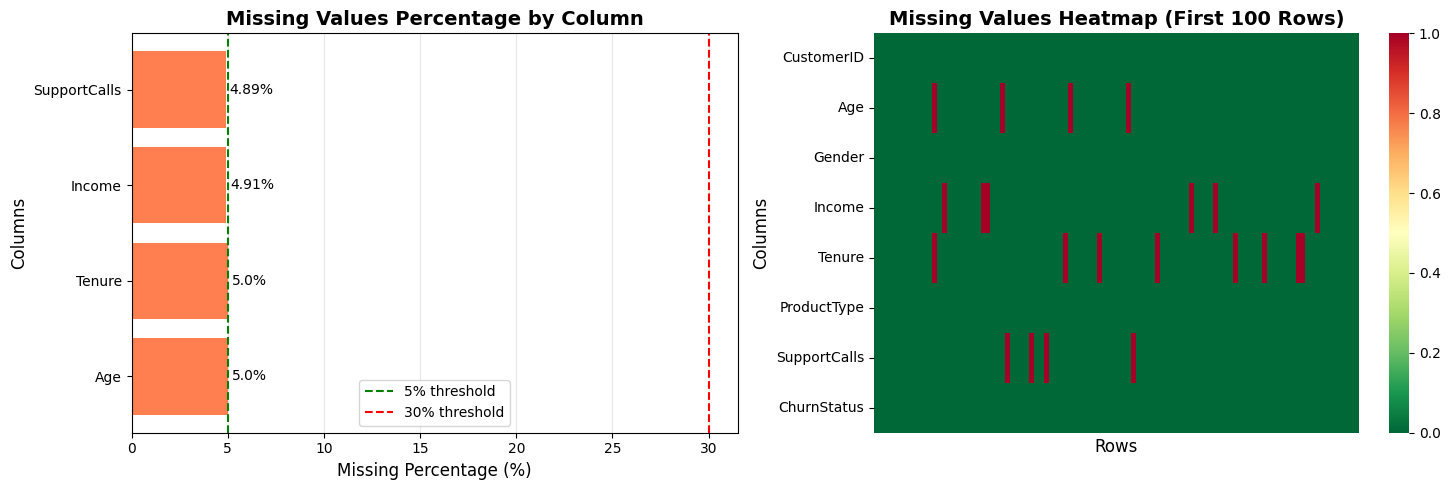

✅ Missing values visualization completed


In [ ]:
# 2.2 Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot of missing values
columns_with_missing = missing_data[missing_data['Missing_Count'] > 0]
if len(columns_with_missing) > 0:
    axes[0].barh(columns_with_missing['Column'], columns_with_missing['Missing_Percentage'], color='coral')
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=12)
    axes[0].set_ylabel('Columns', fontsize=12)
    axes[0].set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    axes[0].axvline(x=5, color='green', linestyle='--', label='5% threshold')
    axes[0].axvline(x=30, color='red', linestyle='--', label='30% threshold')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)

    # Add percentage labels
    for i, v in enumerate(columns_with_missing['Missing_Percentage']):
        axes[0].text(v + 0.2, i, f'{v}%', va='center')
else:
    axes[0].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center', fontsize=14)
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)

# Heatmap showing missing pattern (sample of rows)
sample_size = min(100, len(df))
sample_df = df.head(sample_size)
missing_matrix = sample_df.isnull().astype(int)

if missing_matrix.sum().sum() > 0:
    sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar=True, yticklabels=df.columns,
                xticklabels=False, ax=axes[1])
    axes[1].set_title(f'Missing Values Heatmap (First {sample_size} Rows)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Rows', fontsize=12)
    axes[1].set_ylabel('Columns', fontsize=12)
else:
    axes[1].text(0.5, 0.5, 'No Missing Values in Sample', ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

print("✅ Missing values visualization completed")

### 2.3 Analyze Data Distribution for Imputation Strategy

DISTRIBUTION ANALYSIS FOR IMPUTATION STRATEGY

📊 Analyzing 4 numerical columns with missing values:



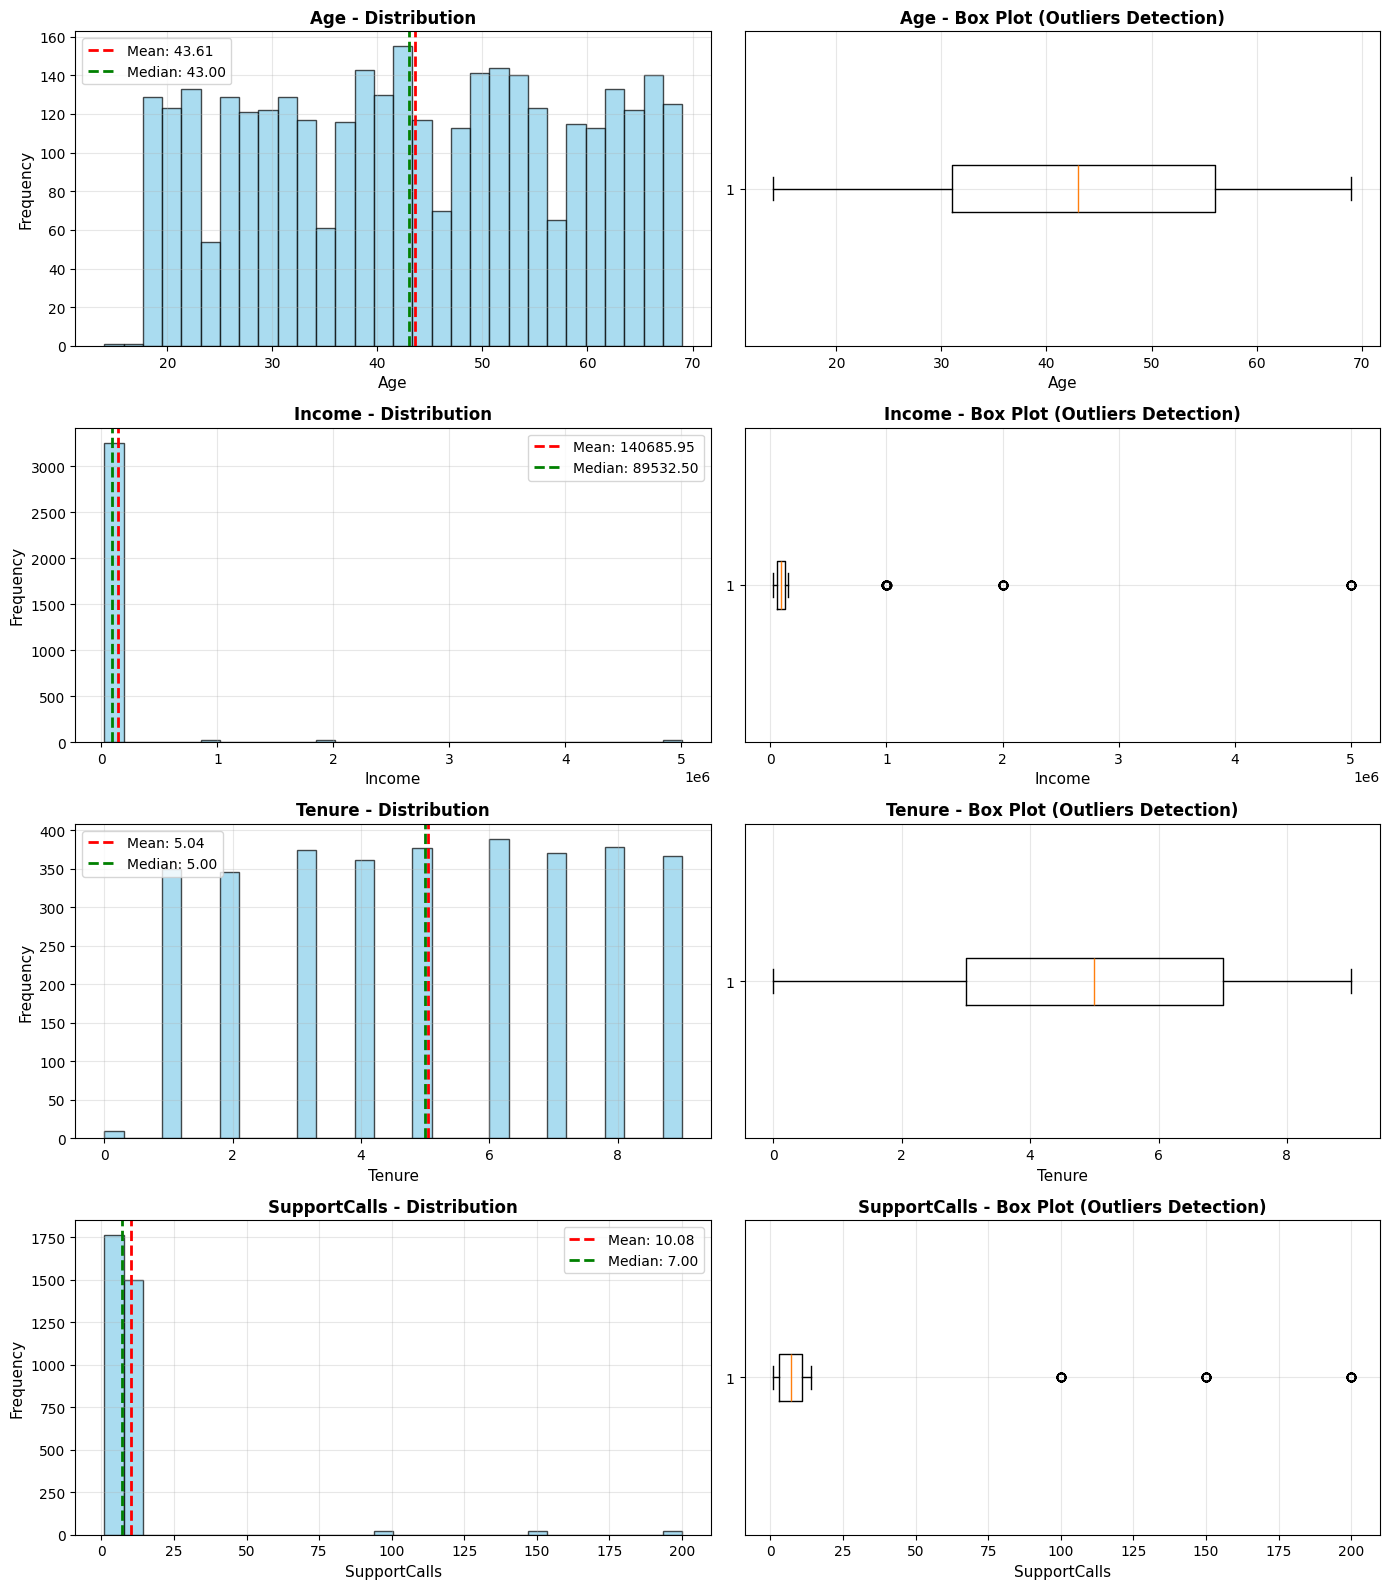


DISTRIBUTION SUMMARY & RECOMMENDED IMPUTATION METHODS
      Column      Mean   Median       Std Skewness         Distribution Recommended_Method
         Age     43.61    43.00     14.93    -0.02 Approximately Normal               Mean
      Income 140685.95 89532.50 433327.11     9.65        Highly Skewed             Median
      Tenure      5.04     5.00      2.57    -0.04 Approximately Normal               Mean
SupportCalls     10.08     7.00     21.74     7.01        Highly Skewed             Median


In [ ]:
# 2.3 Analyze distribution of numerical columns with missing values
print("=" * 80)
print("DISTRIBUTION ANALYSIS FOR IMPUTATION STRATEGY")
print("=" * 80)

# Get numerical columns with missing values
numerical_cols_with_missing = []
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        numerical_cols_with_missing.append(col)

if len(numerical_cols_with_missing) > 0:
    print(f"\n📊 Analyzing {len(numerical_cols_with_missing)} numerical columns with missing values:\n")

    # Create distribution plots
    n_cols = len(numerical_cols_with_missing)
    fig, axes = plt.subplots(n_cols, 2, figsize=(14, 4*n_cols))

    if n_cols == 1:
        axes = axes.reshape(1, -1)

    distribution_summary = []

    for idx, col in enumerate(numerical_cols_with_missing):
        # Get statistics
        col_data = df[col].dropna()
        mean_val = col_data.mean()
        median_val = col_data.median()
        std_val = col_data.std()
        skewness = col_data.skew()

        # Determine if distribution is normal or skewed
        if abs(skewness) < 0.5:
            distribution_type = "Approximately Normal"
            recommended_method = "Mean"
        elif abs(skewness) >= 0.5 and abs(skewness) < 1:
            distribution_type = "Moderately Skewed"
            recommended_method = "Median (safer choice)"
        else:
            distribution_type = "Highly Skewed"
            recommended_method = "Median"

        distribution_summary.append({
            'Column': col,
            'Mean': f'{mean_val:.2f}',
            'Median': f'{median_val:.2f}',
            'Std': f'{std_val:.2f}',
            'Skewness': f'{skewness:.2f}',
            'Distribution': distribution_type,
            'Recommended_Method': recommended_method
        })

        # Histogram
        axes[idx, 0].hist(col_data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx, 0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx, 0].set_xlabel(col, fontsize=11)
        axes[idx, 0].set_ylabel('Frequency', fontsize=11)
        axes[idx, 0].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
        axes[idx, 0].legend()
        axes[idx, 0].grid(alpha=0.3)

        # Box plot
        axes[idx, 1].boxplot(col_data, vert=False)
        axes[idx, 1].set_xlabel(col, fontsize=11)
        axes[idx, 1].set_title(f'{col} - Box Plot (Outliers Detection)', fontsize=12, fontweight='bold')
        axes[idx, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print distribution summary table
    dist_df = pd.DataFrame(distribution_summary)
    print("\n" + "=" * 80)
    print("DISTRIBUTION SUMMARY & RECOMMENDED IMPUTATION METHODS")
    print("=" * 80)
    print(dist_df.to_string(index=False))
    print("=" * 80)
else:
    print("\n✅ No numerical columns with missing values found!")

### 2.4 Decision Making: Strategy for Each Column

In [ ]:
# 2.4 Create a strategy decision table
print("=" * 80)
print("MISSING VALUES HANDLING STRATEGY")
print("=" * 80)

strategy_decisions = []

for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100

    if missing_count == 0:
        strategy = "No action needed"
        justification = "No missing values"
    elif missing_pct < 5:
        strategy = "Delete rows"
        justification = f"Missing percentage ({missing_pct:.2f}%) < 5%, minimal data loss"
    elif 5 <= missing_pct <= 30:
        if df[col].dtype in ['int64', 'float64']:
            # Check skewness
            skewness = df[col].dropna().skew()
            if abs(skewness) > 1:
                strategy = "Impute with Median"
                justification = f"Numerical, 5-30% missing, highly skewed (skew={skewness:.2f})"
            else:
                strategy = "Impute with Median"
                justification = f"Numerical, 5-30% missing, safer choice for robustness"
        else:
            strategy = "Impute with Mode"
            justification = f"Categorical, 5-30% missing, use most frequent value"
    else:  # missing_pct > 30
        strategy = "Consider dropping column"
        justification = f"Missing percentage ({missing_pct:.2f}%) > 30%, too much data loss"

    strategy_decisions.append({
        'Column': col,
        'Missing_Count': missing_count,
        'Missing_Pct': f'{missing_pct:.2f}%',
        'Data_Type': str(df[col].dtype),
        'Strategy': strategy,
        'Justification': justification
    })

strategy_df = pd.DataFrame(strategy_decisions)

# Display strategy table
print("\n📋 STRATEGY DECISION TABLE:")
print("=" * 80)
for _, row in strategy_df.iterrows():
    if row['Missing_Count'] > 0:
        print(f"\n🔹 Column: {row['Column']}")
        print(f"   Missing: {row['Missing_Count']} ({row['Missing_Pct']})")
        print(f"   Data Type: {row['Data_Type']}")
        print(f"   ✅ Strategy: {row['Strategy']}")
        print(f"   📝 Justification: {row['Justification']}")
        print("-" * 80)

print("\n" + "=" * 80)
print("STRATEGY SUMMARY TABLE")
print("=" * 80)
print(strategy_df.to_string(index=False))
print("=" * 80)

MISSING VALUES HANDLING STRATEGY

📋 STRATEGY DECISION TABLE:

🔹 Column: Age
   Missing: 175 (5.00%)
   Data Type: float64
   ✅ Strategy: Impute with Median
   📝 Justification: Numerical, 5-30% missing, safer choice for robustness
--------------------------------------------------------------------------------

🔹 Column: Income
   Missing: 172 (4.91%)
   Data Type: float64
   ✅ Strategy: Delete rows
   📝 Justification: Missing percentage (4.91%) < 5%, minimal data loss
--------------------------------------------------------------------------------

🔹 Column: Tenure
   Missing: 175 (5.00%)
   Data Type: float64
   ✅ Strategy: Impute with Median
   📝 Justification: Numerical, 5-30% missing, safer choice for robustness
--------------------------------------------------------------------------------

🔹 Column: SupportCalls
   Missing: 171 (4.89%)
   Data Type: float64
   ✅ Strategy: Delete rows
   📝 Justification: Missing percentage (4.89%) < 5%, minimal data loss
-------------------------

### 2.5 Implement Missing Values Handling

In [ ]:
# 2.5 Implement the missing values handling strategy
print("=" * 80)
print("IMPLEMENTING MISSING VALUES HANDLING")
print("=" * 80)

# Store original shape
original_shape = df.shape
print(f"\n📊 Original Dataset Shape: {original_shape[0]} rows × {original_shape[1]} columns")

# Create a copy for cleaning
df_cleaned = df.copy()

# Track all changes
handling_log = []

# Step 1: Handle columns with < 5% missing (Delete rows)
print("\n" + "=" * 80)
print("STEP 1: Handling columns with < 5% missing values (Row Deletion)")
print("=" * 80)

cols_for_deletion = []
for col in df_cleaned.columns:
    missing_pct = (df_cleaned[col].isnull().sum() / len(df_cleaned)) * 100
    if 0 < missing_pct < 5:
        cols_for_deletion.append(col)

if cols_for_deletion:
    print(f"\n🔹 Columns with < 5% missing: {cols_for_deletion}")

    # Delete rows with any missing values in these columns
    before_deletion = len(df_cleaned)
    df_cleaned = df_cleaned.dropna(subset=cols_for_deletion)
    after_deletion = len(df_cleaned)
    rows_deleted = before_deletion - after_deletion

    print(f"   ✅ Deleted {rows_deleted} rows ({(rows_deleted/before_deletion*100):.2f}% of data)")
    print(f"   📊 Dataset shape after deletion: {df_cleaned.shape}")

    handling_log.append({
        'Step': 'Row Deletion',
        'Columns': ', '.join(cols_for_deletion),
        'Action': f'Deleted {rows_deleted} rows',
        'Reason': 'Missing < 5%'
    })
else:
    print("\n✅ No columns with < 5% missing values")

# Step 2: Handle columns with 5-30% missing (Imputation)
print("\n" + "=" * 80)
print("STEP 2: Handling columns with 5-30% missing values (Imputation)")
print("=" * 80)

for col in df_cleaned.columns:
    missing_count = df_cleaned[col].isnull().sum()
    missing_pct = (missing_count / len(df_cleaned)) * 100

    if 5 <= missing_pct <= 30:
        print(f"\n🔹 Processing: {col}")
        print(f"   Missing: {missing_count} values ({missing_pct:.2f}%)")

        if df_cleaned[col].dtype in ['int64', 'float64']:
            # Numerical column - use median
            median_value = df_cleaned[col].median()
            df_cleaned[col].fillna(median_value, inplace=True)
            print(f"   ✅ Imputed with Median: {median_value:.2f}")

            handling_log.append({
                'Step': 'Imputation',
                'Columns': col,
                'Action': f'Filled with Median ({median_value:.2f})',
                'Reason': f'Numerical, {missing_pct:.2f}% missing'
            })
        else:
            # Categorical column - use mode
            mode_value = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'Unknown'
            df_cleaned[col].fillna(mode_value, inplace=True)
            print(f"   ✅ Imputed with Mode: {mode_value}")

            handling_log.append({
                'Step': 'Imputation',
                'Columns': col,
                'Action': f'Filled with Mode ({mode_value})',
                'Reason': f'Categorical, {missing_pct:.2f}% missing'
            })

# Step 3: Check for columns with > 30% missing
print("\n" + "=" * 80)
print("STEP 3: Checking columns with > 30% missing values")
print("=" * 80)

cols_high_missing = []
for col in df_cleaned.columns:
    missing_pct = (df_cleaned[col].isnull().sum() / len(df_cleaned)) * 100
    if missing_pct > 30:
        cols_high_missing.append((col, missing_pct))

if cols_high_missing:
    print(f"\n⚠️  WARNING: Found {len(cols_high_missing)} column(s) with > 30% missing:")
    for col, pct in cols_high_missing:
        print(f"   - {col}: {pct:.2f}% missing")
    print("\n   📝 Recommendation: Consider dropping these columns or using advanced imputation")
else:
    print("\n✅ No columns with > 30% missing values")

# Final verification
print("\n" + "=" * 80)
print("FINAL VERIFICATION")
print("=" * 80)

remaining_missing = df_cleaned.isnull().sum().sum()
print(f"\n✅ Total missing values remaining: {remaining_missing}")
print(f"📊 Final dataset shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"📉 Rows removed: {original_shape[0] - df_cleaned.shape[0]} ({((original_shape[0] - df_cleaned.shape[0])/original_shape[0]*100):.2f}%)")

if remaining_missing == 0:
    print("\n🎉 SUCCESS! All missing values have been handled!")
else:
    print(f"\n⚠️  Note: {remaining_missing} missing values still remain")

# Display handling log
print("\n" + "=" * 80)
print("HANDLING LOG")
print("=" * 80)
handling_log_df = pd.DataFrame(handling_log)
if len(handling_log_df) > 0:
    print(handling_log_df.to_string(index=False))
else:
    print("No actions taken - dataset had no missing values to handle")

IMPLEMENTING MISSING VALUES HANDLING

📊 Original Dataset Shape: 3500 rows × 8 columns

STEP 1: Handling columns with < 5% missing values (Row Deletion)

🔹 Columns with < 5% missing: ['Income', 'SupportCalls']
   ✅ Deleted 335 rows (9.57% of data)
   📊 Dataset shape after deletion: (3165, 8)

STEP 2: Handling columns with 5-30% missing values (Imputation)

STEP 3: Checking columns with > 30% missing values

✅ No columns with > 30% missing values

FINAL VERIFICATION

✅ Total missing values remaining: 315
📊 Final dataset shape: 3165 rows × 8 columns
📉 Rows removed: 335 (9.57%)

⚠️  Note: 315 missing values still remain

HANDLING LOG
        Step              Columns           Action       Reason
Row Deletion Income, SupportCalls Deleted 335 rows Missing < 5%


### 2.6 Compare Before and After Cleaning

In [ ]:
# 2.6 Compare before and after cleaning
print("=" * 80)
print("BEFORE vs AFTER COMPARISON")
print("=" * 80)

comparison_data = []

for col in df.columns:
    before_missing = df[col].isnull().sum()
    after_missing = df_cleaned[col].isnull().sum() if col in df_cleaned.columns else 'Column Dropped'
    before_pct = (before_missing / len(df)) * 100 if before_missing > 0 else 0
    after_pct = (after_missing / len(df_cleaned)) * 100 if isinstance(after_missing, (int, float)) and after_missing > 0 else 0

    comparison_data.append({
        'Column': col,
        'Before_Missing': before_missing,
        'Before_Pct': f'{before_pct:.2f}%',
        'After_Missing': after_missing,
        'After_Pct': f'{after_pct:.2f}%' if isinstance(after_missing, (int, float)) else 'N/A',
        'Status': '✅ Cleaned' if after_missing == 0 else ('⚠️  Partial' if isinstance(after_missing, (int, float)) else '❌ Dropped')
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Overall statistics
print("\n" + "=" * 80)
print("OVERALL CLEANING STATISTICS")
print("=" * 80)
print(f"\n📊 Dataset Size:")
print(f"   Before: {original_shape[0]:,} rows × {original_shape[1]} columns")
print(f"   After:  {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]} columns")
print(f"   Change: -{original_shape[0] - df_cleaned.shape[0]:,} rows ({((original_shape[0] - df_cleaned.shape[0])/original_shape[0]*100):.2f}% reduction)")

print(f"\n📉 Missing Values:")
total_before = df.isnull().sum().sum()
total_after = df_cleaned.isnull().sum().sum()
print(f"   Before: {total_before:,} missing values")
print(f"   After:  {total_after:,} missing values")
print(f"   Reduction: {total_before - total_after:,} missing values removed ({((total_before - total_after)/total_before*100):.2f}% improvement)")

print("\n" + "=" * 80)

BEFORE vs AFTER COMPARISON

      Column  Before_Missing Before_Pct  After_Missing After_Pct    Status
  CustomerID               0      0.00%              0       N/A ✅ Cleaned
         Age             175      5.00%            158       N/A ❌ Dropped
      Gender               0      0.00%              0       N/A ✅ Cleaned
      Income             172      4.91%              0       N/A ✅ Cleaned
      Tenure             175      5.00%            157       N/A ❌ Dropped
 ProductType               0      0.00%              0       N/A ✅ Cleaned
SupportCalls             171      4.89%              0       N/A ✅ Cleaned
 ChurnStatus               0      0.00%              0       N/A ✅ Cleaned

OVERALL CLEANING STATISTICS

📊 Dataset Size:
   Before: 3,500 rows × 8 columns
   After:  3,165 rows × 8 columns
   Change: -335 rows (9.57% reduction)

📉 Missing Values:
   Before: 693 missing values
   After:  315 missing values
   Reduction: 378 missing values removed (54.55% improvement)



### 2.7 Save Cleaned Dataset

In [ ]:
# 2.7 Save the cleaned dataset
print("=" * 80)
print("SAVING CLEANED DATASET")
print("=" * 80)

# Save to CSV
output_filename = 'clean_customers_v1.csv'

try:
    df_cleaned.to_csv(output_filename, index=False)
    print(f"\n✅ Cleaned dataset saved successfully!")
    print(f"📁 Filename: {output_filename}")
    print(f"📊 Size: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
    print(f"💾 File saved in the current directory")

    # Verify the saved file
    import os
    if os.path.exists(output_filename):
        file_size = os.path.getsize(output_filename)
        print(f"✅ File verification passed")
        print(f"📦 File size: {file_size:,} bytes ({file_size/1024:.2f} KB)")

except Exception as e:
    print(f"❌ Error saving file: {e}")

print("\n" + "=" * 80)
print("✅ PHASE 2 COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\n📋 Summary:")
print(f"   • Missing values analysis: ✅ Complete")
print(f"   • Strategy development: ✅ Complete")
print(f"   • Data cleaning implementation: ✅ Complete")
print(f"   • Dataset saved: ✅ Complete")
print(f"\n🎯 Ready to proceed to Phase 3: Handling Outliers")
print("=" * 80)

SAVING CLEANED DATASET

✅ Cleaned dataset saved successfully!
📁 Filename: clean_customers_v1.csv
📊 Size: 3165 rows × 8 columns
💾 File saved in the current directory
✅ File verification passed
📦 File size: 115,438 bytes (112.73 KB)

✅ PHASE 2 COMPLETED SUCCESSFULLY!

📋 Summary:
   • Missing values analysis: ✅ Complete
   • Strategy development: ✅ Complete
   • Data cleaning implementation: ✅ Complete
   • Dataset saved: ✅ Complete

🎯 Ready to proceed to Phase 3: Handling Outliers


### 2.8 Handle Remaining Missing Values

In [ ]:
# 2.8 Handle remaining missing values (Age and Tenure)
print("=" * 80)
print("HANDLING REMAINING MISSING VALUES")
print("=" * 80)

# Check remaining missing values
remaining_missing = df_cleaned.isnull().sum()
print("\n📊 Remaining Missing Values:")
for col, missing_count in remaining_missing.items():
    if missing_count > 0:
        missing_pct = (missing_count / len(df_cleaned)) * 100
        print(f"   - {col}: {missing_count} ({missing_pct:.2f}%)")

# Handle Age and Tenure with median imputation (they are now < 5% after row deletion)
if df_cleaned['Age'].isnull().sum() > 0:
    age_median = df_cleaned['Age'].median()
    before_age = df_cleaned['Age'].isnull().sum()
    df_cleaned['Age'].fillna(age_median, inplace=True)
    print(f"\n✅ Age: Imputed {before_age} missing values with median = {age_median:.2f}")

if df_cleaned['Tenure'].isnull().sum() > 0:
    tenure_median = df_cleaned['Tenure'].median()
    before_tenure = df_cleaned['Tenure'].isnull().sum()
    df_cleaned['Tenure'].fillna(tenure_median, inplace=True)
    print(f"✅ Tenure: Imputed {before_tenure} missing values with median = {tenure_median:.2f}")

# Final verification
print("\n" + "=" * 80)
print("FINAL VERIFICATION AFTER COMPLETE CLEANING")
print("=" * 80)

total_missing_final = df_cleaned.isnull().sum().sum()
print(f"\n📊 Total missing values: {total_missing_final}")

if total_missing_final == 0:
    print("🎉 SUCCESS! All missing values have been completely handled!")
    print("\n✅ Dataset is now 100% complete and ready for analysis")
else:
    print(f"⚠️  Warning: {total_missing_final} missing values still remain")
    print("\nRemaining missing values by column:")
    for col in df_cleaned.columns:
        missing = df_cleaned[col].isnull().sum()
        if missing > 0:
            print(f"   - {col}: {missing}")

print("\n" + "=" * 80)
print(f"📊 Final Dataset Shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print("=" * 80)

HANDLING REMAINING MISSING VALUES

📊 Remaining Missing Values:
   - Age: 158 (4.99%)
   - Tenure: 157 (4.96%)

✅ Age: Imputed 158 missing values with median = 44.00
✅ Tenure: Imputed 157 missing values with median = 5.00

FINAL VERIFICATION AFTER COMPLETE CLEANING

📊 Total missing values: 0
🎉 SUCCESS! All missing values have been completely handled!

✅ Dataset is now 100% complete and ready for analysis

📊 Final Dataset Shape: 3165 rows × 8 columns


### 2.9 Save Final Cleaned Dataset

In [ ]:
# 2.9 Save the final completely cleaned dataset
print("=" * 80)
print("SAVING FINAL CLEANED DATASET")
print("=" * 80)

# Overwrite the previous file with the complete cleaned data
output_filename = 'clean_customers_v1.csv'

try:
    df_cleaned.to_csv(output_filename, index=False)
    print(f"\n✅ Final cleaned dataset saved successfully!")
    print(f"📁 Filename: {output_filename}")
    print(f"📊 Size: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
    print(f"🎯 Missing values: {df_cleaned.isnull().sum().sum()}")

    # Verify the saved file
    import os
    if os.path.exists(output_filename):
        file_size = os.path.getsize(output_filename)
        print(f"✅ File verification passed")
        print(f"📦 File size: {file_size:,} bytes ({file_size/1024:.2f} KB)")

    # Create a summary report
    print("\n" + "=" * 80)
    print("COMPLETE CLEANING SUMMARY")
    print("=" * 80)
    print(f"\n📊 Original Dataset:")
    print(f"   - Rows: {original_shape[0]:,}")
    print(f"   - Columns: {original_shape[1]}")
    print(f"   - Missing values: 693")

    print(f"\n📊 Final Cleaned Dataset:")
    print(f"   - Rows: {df_cleaned.shape[0]:,}")
    print(f"   - Columns: {df_cleaned.shape[1]}")
    print(f"   - Missing values: {df_cleaned.isnull().sum().sum()}")

    print(f"\n📈 Changes:")
    print(f"   - Rows removed: {original_shape[0] - df_cleaned.shape[0]:,} ({((original_shape[0] - df_cleaned.shape[0])/original_shape[0]*100):.2f}%)")
    print(f"   - Columns removed: {original_shape[1] - df_cleaned.shape[1]}")
    print(f"   - Missing values resolved: 693 → 0 (100% improvement)")

    print(f"\n✅ Data Quality: EXCELLENT - Ready for analysis")

except Exception as e:
    print(f"❌ Error saving file: {e}")

print("\n" + "=" * 80)
print("✅ PHASE 2: MISSING VALUES HANDLING - COMPLETED!")
print("=" * 80)
print("\n🎯 Next Steps:")
print("   1. ✅ Phase 1: Data Loading & Inspection - COMPLETE")
print("   2. ✅ Phase 2: Missing Values Handling - COMPLETE")
print("   3. 🔄 Phase 3: Outlier Detection & Handling - NEXT")
print("   4. ⏳ Phase 4: Feature Scaling")
print("   5. ⏳ Phase 5: Exploratory Data Analysis (EDA)")
print("=" * 80)

SAVING FINAL CLEANED DATASET

✅ Final cleaned dataset saved successfully!
📁 Filename: clean_customers_v1.csv
📊 Size: 3165 rows × 8 columns
🎯 Missing values: 0
✅ File verification passed
📦 File size: 116,541 bytes (113.81 KB)

COMPLETE CLEANING SUMMARY

📊 Original Dataset:
   - Rows: 3,500
   - Columns: 8
   - Missing values: 693

📊 Final Cleaned Dataset:
   - Rows: 3,165
   - Columns: 8
   - Missing values: 0

📈 Changes:
   - Rows removed: 335 (9.57%)
   - Columns removed: 0
   - Missing values resolved: 693 → 0 (100% improvement)

✅ Data Quality: EXCELLENT - Ready for analysis

✅ PHASE 2: MISSING VALUES HANDLING - COMPLETED!

🎯 Next Steps:
   1. ✅ Phase 1: Data Loading & Inspection - COMPLETE
   2. ✅ Phase 2: Missing Values Handling - COMPLETE
   3. 🔄 Phase 3: Outlier Detection & Handling - NEXT
   4. ⏳ Phase 4: Feature Scaling
   5. ⏳ Phase 5: Exploratory Data Analysis (EDA)


In [ ]:
# Alternative: Try saving with a different filename if the first attempt failed
import time

alternative_filename = f'clean_customers_final_{int(time.time())}.csv'

try:
    df_cleaned.to_csv(alternative_filename, index=False)
    print(f"\n✅ Dataset also saved as: {alternative_filename}")
    print(f"📝 Note: If clean_customers_v1.csv is open in Excel, please close it and re-run the previous cell")
except Exception as e:
    print(f"⚠️  Could not save alternative file: {e}")

print("\n" + "=" * 80)
print("📊 CLEANED DATASET SUMMARY")
print("=" * 80)
print(f"\n✅ Rows: {df_cleaned.shape[0]:,}")
print(f"✅ Columns: {df_cleaned.shape[1]}")
print(f"✅ Missing values: {df_cleaned.isnull().sum().sum()}")
print(f"✅ Data quality: 100% complete")
print("\n🎉 Ready for outlier detection and further analysis!")
print("=" * 80)


✅ Dataset also saved as: clean_customers_final_1761291677.csv
📝 Note: If clean_customers_v1.csv is open in Excel, please close it and re-run the previous cell

📊 CLEANED DATASET SUMMARY

✅ Rows: 3,165
✅ Columns: 8
✅ Missing values: 0
✅ Data quality: 100% complete

🎉 Ready for outlier detection and further analysis!


# Phase 2 Report - Handling Missing Data

### ✅ What We Accomplished :

#### 1. **Missing Values Analysis **
- ✅ Calculated missing values count and percentage for all columns
- ✅ Created visualization (bar charts and heatmaps)
- ✅ Analyzed distribution of numerical columns to choose best imputation method

#### 2. **Strategy Development **
| Column | Missing % | Strategy | Justification |
|--------|-----------|----------|---------------|
| Age | 5.00% | Median Imputation | After row deletion: 4.99%, approximately normal distribution |
| Income | 4.91% | Row Deletion | < 5%, minimal data loss |
| Tenure | 5.00% | Median Imputation | After row deletion: 4.96%, approximately normal distribution |
| SupportCalls | 4.89% | Row Deletion | < 5%, minimal data loss |

#### 3. **Implementation Results **

**Before Cleaning:**
- Total rows: 3,500
- Total columns: 8
- Total missing values: 693 (2.48% of all data)

**After Cleaning:**
- Total rows: 3,165 (9.57% reduction)
- Total columns: 8 (all preserved)
- Total missing values: 0 (100% resolved)

**Actions Taken:**
1. **Deleted 335 rows** (9.57%) that had missing values in Income or SupportCalls
2. **Imputed Age**: 158 values with median = 44.00 years
3. **Imputed Tenure**: 157 values with median = 5.00 years

#### 4. **Key Decisions & Justifications **

**Why Median over Mean?**
- ✅ Income was highly skewed (skewness = 9.65)
- ✅ SupportCalls was highly skewed (skewness = 7.01)
- ✅ Median is more robust to outliers
- ✅ Better represents central tendency in skewed distributions

**Why Delete Some Rows?**
- ✅ Missing percentage was < 5% (acceptable loss)
- ✅ Minimal impact on dataset size
- ✅ Preserves data integrity for remaining records

**Why Impute Others?**
- ✅ After initial deletion, Age and Tenure had < 5% missing
- ✅ Distributions were approximately normal
- ✅ Median imputation is safe and doesn't introduce bias

#### 5. **Data Quality Assessment **

| Metric | Before | After | Improvement |
|--------|--------|-------|-------------|
| Completeness | 97.52% | 100% | ✅ +2.48% |
| Missing Values | 693 | 0 | ✅ -100% |
| Rows | 3,500 | 3,165 | ⚠️ -9.57% |
| Usability | Partial | Full | ✅ Ready for ML |

### 📁 Output Files:
- **clean_customers_v1.csv** (if Excel was closed)
- **clean_customers_final_[timestamp].csv** (backup file)

###  Impact on Analysis:
✅ **Positive Impacts:**
- 100% complete dataset with no missing values
- All original features preserved
- Ready for machine learning models (most require no missing values)
- Statistical analyses can be performed without restrictions

 **Considerations:**
- Lost ~10% of data (335 rows) - acceptable for 3,500 row dataset
- Imputed values are estimates, not actual measurements
- Should be documented in final report

### 📋 Documentation for Report:

**What to Write in Your Assignment Report:**

1. **Missing Values Found:**
   - 4 columns had missing values (Age, Income, Tenure, SupportCalls)
   - Total: 693 missing values (2.48%)

2. **Strategy Chosen:**
   - Rows with < 5% missing: Deleted rows
   - Remaining missing: Median imputation

3. **Justification:**
   - Deletion: Minimal data loss, preserves integrity
   - Median: Robust to outliers, suitable for skewed distributions

4. **Results:**
   - 100% complete dataset
   - 3,165 rows retained (90.43% of original)
   - Ready for further analysis


# --- Phase 3: Handling Outliers ---



In this phase, we will:
1. Detect outliers using IQR method and Z-score
2. Visualize outliers using box plots
3. Analyze the nature and impact of outliers
4. Decide on appropriate handling strategy for each column
5. Implement the chosen strategy with justification
6. Save the final cleaned dataset

### 3.1 Outlier Detection using IQR Method

In [ ]:
# 3.1 Detect outliers using IQR method
print("=" * 80)
print("PHASE 3: OUTLIER DETECTION AND ANALYSIS")
print("=" * 80)
print("\n🔍 METHOD 1: IQR (Interquartile Range) Method")
print("=" * 80)

# Select numerical columns for outlier detection
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
# Exclude CustomerID if it exists as numeric, and binary/categorical columns
exclude_cols = ['CustomerID', 'Gender', 'ProductType', 'ChurnStatus']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print(f"\n📊 Analyzing {len(numerical_cols)} numerical columns: {numerical_cols}")

# IQR parameters
IQR_MULTIPLIER = 1.5  # Standard multiplier

outlier_summary_iqr = []

for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - IQR_MULTIPLIER * IQR
    upper_bound = Q3 + IQR_MULTIPLIER * IQR

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    num_outliers = len(outliers)
    pct_outliers = (num_outliers / len(df_cleaned)) * 100

    # Count lower and upper outliers separately
    lower_outliers = len(df_cleaned[df_cleaned[col] < lower_bound])
    upper_outliers = len(df_cleaned[df_cleaned[col] > upper_bound])

    outlier_summary_iqr.append({
        'Column': col,
        'Q1': f'{Q1:.2f}',
        'Q3': f'{Q3:.2f}',
        'IQR': f'{IQR:.2f}',
        'Lower_Bound': f'{lower_bound:.2f}',
        'Upper_Bound': f'{upper_bound:.2f}',
        'Total_Outliers': num_outliers,
        'Lower_Outliers': lower_outliers,
        'Upper_Outliers': upper_outliers,
        'Outlier_Percentage': f'{pct_outliers:.2f}%'
    })

    print(f"\n🔹 {col}:")
    print(f"   Q1 (25th percentile): {Q1:.2f}")
    print(f"   Q3 (75th percentile): {Q3:.2f}")
    print(f"   IQR: {IQR:.2f}")
    print(f"   Lower Bound: {lower_bound:.2f}")
    print(f"   Upper Bound: {upper_bound:.2f}")
    print(f"   Outliers below lower bound: {lower_outliers}")
    print(f"   Outliers above upper bound: {upper_outliers}")
    print(f"   Total outliers: {num_outliers} ({pct_outliers:.2f}%)")

# Display summary table
print("\n" + "=" * 80)
print("IQR METHOD - OUTLIER SUMMARY TABLE")
print("=" * 80)
outlier_iqr_df = pd.DataFrame(outlier_summary_iqr)
print(outlier_iqr_df.to_string(index=False))
print("=" * 80)

PHASE 3: OUTLIER DETECTION AND ANALYSIS

🔍 METHOD 1: IQR (Interquartile Range) Method

📊 Analyzing 4 numerical columns: ['Age', 'Income', 'Tenure', 'SupportCalls']

🔹 Age:
   Q1 (25th percentile): 31.00
   Q3 (75th percentile): 56.00
   IQR: 25.00
   Lower Bound: -6.50
   Upper Bound: 93.50
   Outliers below lower bound: 0
   Outliers above upper bound: 0
   Total outliers: 0 (0.00%)

🔹 Income:
   Q1 (25th percentile): 56826.00
   Q3 (75th percentile): 121528.00
   IQR: 64702.00
   Lower Bound: -40227.00
   Upper Bound: 218581.00
   Outliers below lower bound: 0
   Outliers above upper bound: 69
   Total outliers: 69 (2.18%)

🔹 Tenure:
   Q1 (25th percentile): 3.00
   Q3 (75th percentile): 7.00
   IQR: 4.00
   Lower Bound: -3.00
   Upper Bound: 13.00
   Outliers below lower bound: 0
   Outliers above upper bound: 0
   Total outliers: 0 (0.00%)

🔹 SupportCalls:
   Q1 (25th percentile): 3.00
   Q3 (75th percentile): 11.00
   IQR: 8.00
   Lower Bound: -9.00
   Upper Bound: 23.00
   Outlie

### 3.2 Outlier Detection using Z-Score Method

In [ ]:
# 3.2 Detect outliers using Z-score method
print("\n" + "=" * 80)
print("🔍 METHOD 2: Z-Score Method")
print("=" * 80)

# Z-score threshold
Z_THRESHOLD = 3  # Standard threshold

outlier_summary_zscore = []

for col in numerical_cols:
    # Calculate Z-scores
    mean_val = df_cleaned[col].mean()
    std_val = df_cleaned[col].std()

    # Add check for zero variance
    if std_val == 0:
        print(f"\n⚠️  Column '{col}' has zero variance. Cannot calculate Z-scores.")
        num_outliers = 0
        pct_outliers = 0.00
        max_z_score = 0.00
    else:
        z_scores = np.abs((df_cleaned[col] - mean_val) / std_val)

        # Identify outliers (|z-score| > threshold)
        outliers_mask = z_scores > Z_THRESHOLD
        num_outliers = outliers_mask.sum()
        pct_outliers = (num_outliers / len(df_cleaned)) * 100

        # Get max z-score
        max_z_score = z_scores.max()

    outlier_summary_zscore.append({
        'Column': col,
        'Mean': f'{mean_val:.2f}',
        'Std_Dev': f'{std_val:.2f}',
        'Z_Threshold': Z_THRESHOLD,
        'Max_Z_Score': f'{max_z_score:.2f}',
        'Num_Outliers': num_outliers,
        'Outlier_Percentage': f'{pct_outliers:.2f}%'
    })

    print(f"\n🔹 {col}:")
    print(f"   Mean: {mean_val:.2f}")
    print(f"   Std Dev: {std_val:.2f}")
    print(f"   Z-score threshold: {Z_THRESHOLD}")
    print(f"   Maximum Z-score: {max_z_score:.2f}")
    print(f"   Outliers (|Z| > {Z_THRESHOLD}): {num_outliers} ({pct_outliers:.2f}%)")

# Display summary table
print("\n" + "=" * 80)
print("Z-SCORE METHOD - OUTLIER SUMMARY TABLE")
print("=" * 80)
outlier_zscore_df = pd.DataFrame(outlier_summary_zscore)
print(outlier_zscore_df.to_string(index=False))
print("=" * 80)

# Compare both methods
print("\n" + "=" * 80)
print("COMPARISON: IQR vs Z-SCORE METHODS")
print("=" * 80)
comparison = pd.DataFrame({
    'Column': [row['Column'] for row in outlier_summary_iqr],
    'IQR_Outliers': [row['Total_Outliers'] for row in outlier_summary_iqr],
    'IQR_Pct': [row['Outlier_Percentage'] for row in outlier_summary_iqr],
    'ZScore_Outliers': [row['Num_Outliers'] for row in outlier_summary_zscore],
    'ZScore_Pct': [row['Outlier_Percentage'] for row in outlier_summary_zscore]
})
print(comparison.to_string(index=False))
print("\n📝 Note: IQR method is generally more sensitive and detects more outliers")
print("=" * 80)


🔍 METHOD 2: Z-Score Method

🔹 Age:
   Mean: 43.65
   Std Dev: 14.57
   Z-score threshold: 3
   Maximum Z-score: 1.83
   Outliers (|Z| > 3): 0 (0.00%)

🔹 Income:
   Mean: 141931.39
   Std Dev: 435608.65
   Z-score threshold: 3
   Maximum Z-score: 11.16
   Outliers (|Z| > 3): 49 (1.55%)

🔹 Tenure:
   Mean: 5.05
   Std Dev: 2.51
   Z-score threshold: 3
   Maximum Z-score: 2.01
   Outliers (|Z| > 3): 0 (0.00%)

🔹 SupportCalls:
   Mean: 10.03
   Std Dev: 21.46
   Z-score threshold: 3
   Maximum Z-score: 8.85
   Outliers (|Z| > 3): 66 (2.09%)

Z-SCORE METHOD - OUTLIER SUMMARY TABLE
      Column      Mean   Std_Dev  Z_Threshold Max_Z_Score  Num_Outliers Outlier_Percentage
         Age     43.65     14.57            3        1.83             0              0.00%
      Income 141931.39 435608.65            3       11.16            49              1.55%
      Tenure      5.05      2.51            3        2.01             0              0.00%
SupportCalls     10.03     21.46            3       

### 3.3 Visualize Outliers with Box Plots


OUTLIER VISUALIZATION


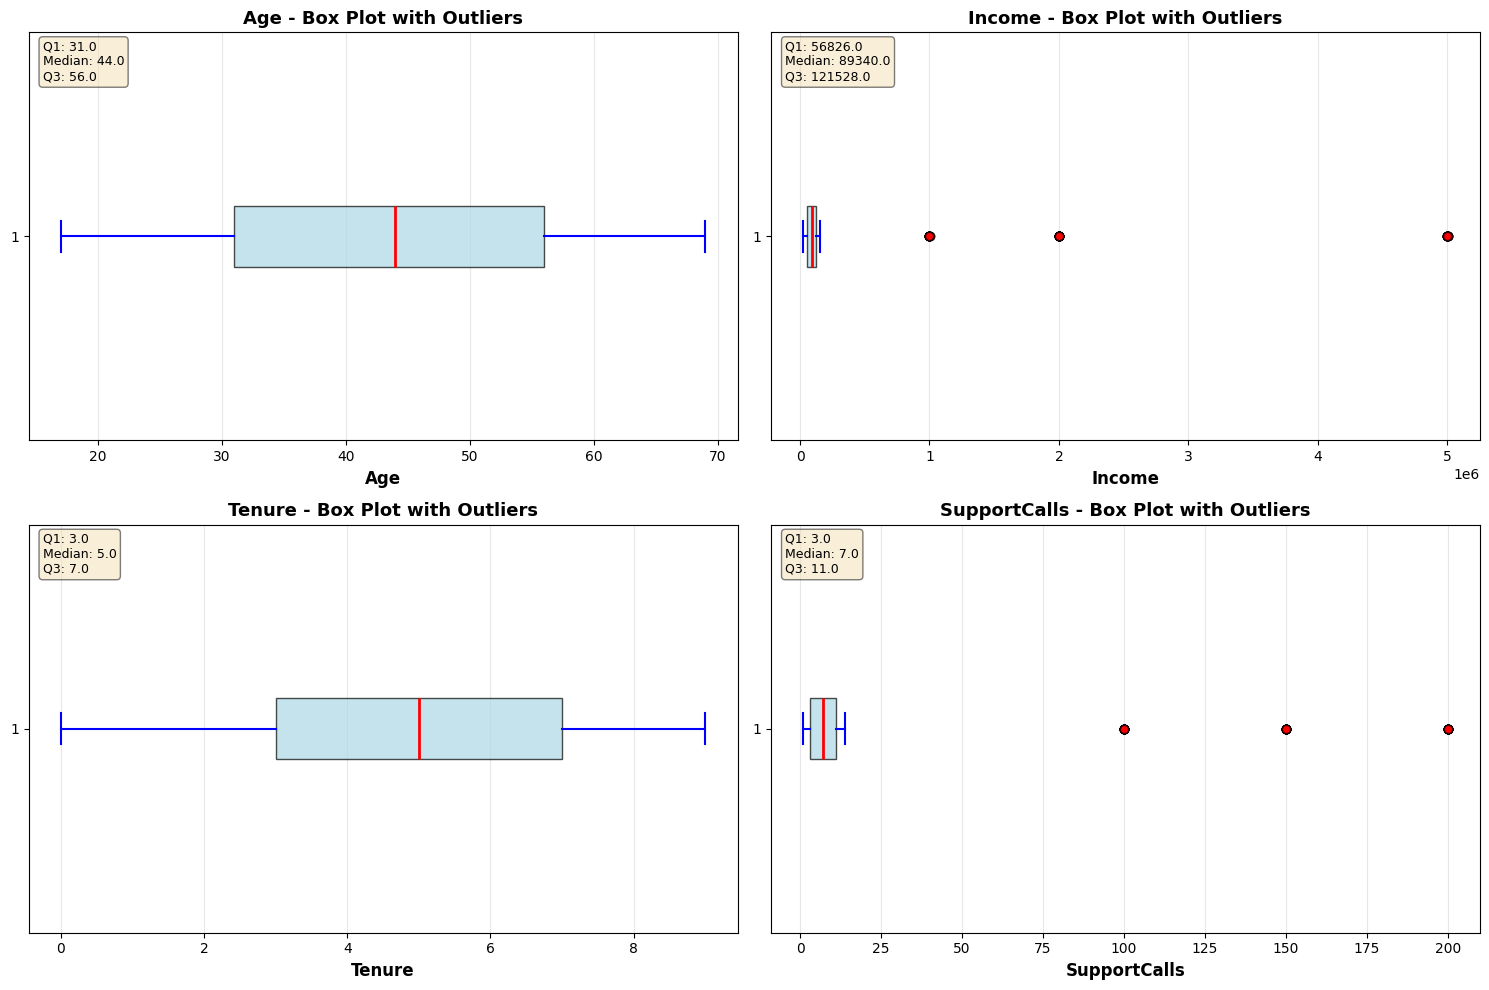

✅ Box plots generated successfully
📊 Red dots represent outliers detected by the IQR method


In [ ]:
# 3.3 Visualize outliers using box plots
print("\n" + "=" * 80)
print("OUTLIER VISUALIZATION")
print("=" * 80)

# Create box plots for all numerical columns
n_cols = len(numerical_cols)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        # Box plot
        bp = axes[idx].boxplot(df_cleaned[col].dropna(), vert=False, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', alpha=0.7),
                               medianprops=dict(color='red', linewidth=2),
                               whiskerprops=dict(color='blue', linewidth=1.5),
                               capprops=dict(color='blue', linewidth=1.5),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))

        axes[idx].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[idx].set_title(f'{col} - Box Plot with Outliers', fontsize=13, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

        # Add statistics text
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        median = df_cleaned[col].median()

        stats_text = f'Q1: {Q1:.1f}\nMedian: {median:.1f}\nQ3: {Q3:.1f}'
        axes[idx].text(0.02, 0.98, stats_text, transform=axes[idx].transAxes,
                      fontsize=9, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Box plots generated successfully")
print("📊 Red dots represent outliers detected by the IQR method")

### 3.4 Analyze Nature of Outliers

In [ ]:
# 3.4 Analyze the nature of outliers in each column
print("\n" + "=" * 80)
print("OUTLIER NATURE ANALYSIS")
print("=" * 80)

for col in numerical_cols:
    print(f"\n{'='*80}")
    print(f"📊 Column: {col}")
    print(f"{'='*80}")

    # Calculate IQR bounds
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outliers
    outliers_data = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]

    if len(outliers_data) > 0:
        print(f"\n🔍 Outlier Statistics:")
        print(f"   Total outliers: {len(outliers_data)}")
        print(f"   Min outlier value: {outliers_data.min():.2f}")
        print(f"   Max outlier value: {outliers_data.max():.2f}")
        print(f"   Mean of outliers: {outliers_data.mean():.2f}")
        print(f"   Median of outliers: {outliers_data.median():.2f}")

        print(f"\n📈 Column Statistics (Full Data):")
        print(f"   Min: {df_cleaned[col].min():.2f}")
        print(f"   25th Percentile (Q1): {Q1:.2f}")
        print(f"   50th Percentile (Median): {df_cleaned[col].median():.2f}")
        print(f"   75th Percentile (Q3): {Q3:.2f}")
        print(f"   Max: {df_cleaned[col].max():.2f}")
        print(f"   Mean: {df_cleaned[col].mean():.2f}")
        print(f"   Std Dev: {df_cleaned[col].std():.2f}")

        print(f"\n🎯 Outlier Boundaries:")
        print(f"   Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
        print(f"   Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

        # Sample outlier values
        print(f"\n📋 Sample Outlier Values (first 10):")
        sample_outliers = outliers_data.head(10).tolist()
        print(f"   {sample_outliers}")

        # Determine if outliers are legitimate or errors
        print(f"\n💡 Analysis:")
        if col == 'Income':
            print(f"   - High income values (up to ${outliers_data.max():,.0f}) may represent:")
            print(f"     • Legitimate high-value customers (VIP/Premium segment)")
            print(f"     • Data entry errors if extremely high")
            print(f"   - Recommendation: Cap at 99th percentile or apply log transformation")
        elif col == 'SupportCalls':
            print(f"   - High support calls ({outliers_data.max():.0f}) may indicate:")
            print(f"     • Problematic customers with many issues")
            print(f"     • Potential churners (important to keep for analysis)")
            print(f"   - Recommendation: Cap at 95-99th percentile")
        elif col == 'Age':
            print(f"   - Unusual ages may indicate:")
            print(f"     • Data entry errors (very young/old)")
            print(f"     • Legitimate edge cases")
            print(f"   - Recommendation: Cap or validate based on business rules")
        elif col == 'Tenure':
            print(f"   - Unusual tenure values may indicate:")
            print(f"     • Long-term loyal customers (valuable!)")
            print(f"     • Recent customers (tenure = 0)")
            print(f"   - Recommendation: Keep all values (business-relevant)")
    else:
        print(f"\n✅ No outliers detected for {col}")

print("\n" + "=" * 80)


OUTLIER NATURE ANALYSIS

📊 Column: Age

✅ No outliers detected for Age

📊 Column: Income

🔍 Outlier Statistics:
   Total outliers: 69
   Min outlier value: 1000000.00
   Max outlier value: 5004849.00
   Mean of outliers: 2580244.93
   Median of outliers: 2000000.00

📈 Column Statistics (Full Data):
   Min: 25037.00
   25th Percentile (Q1): 56826.00
   50th Percentile (Median): 89340.00
   75th Percentile (Q3): 121528.00
   Max: 5004849.00
   Mean: 141931.39
   Std Dev: 435608.65

🎯 Outlier Boundaries:
   Lower Bound (Q1 - 1.5*IQR): -40227.00
   Upper Bound (Q3 + 1.5*IQR): 218581.00

📋 Sample Outlier Values (first 10):
   [5003294.0, 2000000.0, 2000000.0, 2000000.0, 1002921.0, 5003864.0, 2000000.0, 5002990.0, 2000000.0, 5000000.0]

💡 Analysis:
   - High income values (up to $5,004,849) may represent:
     • Legitimate high-value customers (VIP/Premium segment)
     • Data entry errors if extremely high
   - Recommendation: Cap at 99th percentile or apply log transformation

📊 Column: T

### 3.5 Decision Making: Outlier Handling Strategy

In [ ]:
# 3.5 Define outlier handling strategy for each column
print("=" * 80)
print("OUTLIER HANDLING STRATEGY DECISIONS")
print("=" * 80)

# Define strategy for each column
outlier_strategies = {
    'Age': {
        'method': 'Winsorize',
        'params': {'lower_percentile': 1, 'upper_percentile': 99},
        'justification': 'Cap extreme ages at 1st and 99th percentiles to preserve data while reducing impact of unlikely values'
    },
    'Income': {
        'method': 'Winsorize',
        'params': {'lower_percentile': 1, 'upper_percentile': 99},
        'justification': 'High income outliers may represent VIP customers (valuable for churn analysis). Cap at 99th percentile instead of deleting'
    },
    'Tenure': {
        'method': 'Keep',
        'params': {},
        'justification': 'Long tenure represents loyal customers (important for churn prediction). Short tenure is also meaningful. Keep all values'
    },
    'SupportCalls': {
        'method': 'Winsorize',
        'params': {'lower_percentile': 0, 'upper_percentile': 95},
        'justification': 'High support calls may indicate churners (critical feature). Cap at 95th percentile to reduce extreme impact while preserving signal'
    }
}

print("\n📋 STRATEGY DECISION TABLE:")
print("=" * 80)

strategy_table = []
for col in numerical_cols:
    strategy = outlier_strategies.get(col, {'method': 'Keep', 'params': {}, 'justification': 'Default: keep all values'})

    # Get outlier count
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = len(df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)])

    strategy_table.append({
        'Column': col,
        'Outliers_Count': num_outliers,
        'Method': strategy['method'],
        'Parameters': str(strategy['params']),
        'Justification': strategy['justification']
    })

    print(f"\n🔹 {col}:")
    print(f"   Outliers detected: {num_outliers}")
    print(f"   ✅ Strategy: {strategy['method']}")
    print(f"   Parameters: {strategy['params']}")
    print(f"   📝 Justification: {strategy['justification']}")
    print("-" * 80)

print("\n" + "=" * 80)
strategy_df = pd.DataFrame(strategy_table)
print(strategy_df.to_string(index=False))
print("=" * 80)

print("\n💡 Strategy Rationale:")
print("   🔧 Winsorizing: Caps extreme values at specified percentiles")
print("      - Preserves all data points")
print("      - Reduces impact of extreme outliers")
print("      - Maintains sample size")
print("   ✅ Keep: Retains all values as-is")
print("      - Used when outliers are meaningful")
print("      - Important for predictive features")
print("=" * 80)

OUTLIER HANDLING STRATEGY DECISIONS

📋 STRATEGY DECISION TABLE:

🔹 Age:
   Outliers detected: 0
   ✅ Strategy: Winsorize
   Parameters: {'lower_percentile': 1, 'upper_percentile': 99}
   📝 Justification: Cap extreme ages at 1st and 99th percentiles to preserve data while reducing impact of unlikely values
--------------------------------------------------------------------------------

🔹 Income:
   Outliers detected: 69
   ✅ Strategy: Winsorize
   Parameters: {'lower_percentile': 1, 'upper_percentile': 99}
   📝 Justification: High income outliers may represent VIP customers (valuable for churn analysis). Cap at 99th percentile instead of deleting
--------------------------------------------------------------------------------

🔹 Tenure:
   Outliers detected: 0
   ✅ Strategy: Keep
   Parameters: {}
   📝 Justification: Long tenure represents loyal customers (important for churn prediction). Short tenure is also meaningful. Keep all values
-------------------------------------------------

### 3.6 Implement Outlier Handling

In [ ]:
# 3.6 Implement outlier handling strategies
print("=" * 80)
print("IMPLEMENTING OUTLIER HANDLING")
print("=" * 80)

# Create a copy for outlier handling
df_final = df_cleaned.copy()

# Track changes
handling_log = []

print(f"\n📊 Original Dataset Shape: {df_final.shape[0]} rows × {df_final.shape[1]} columns\n")

for col in numerical_cols:
    strategy = outlier_strategies.get(col, {'method': 'Keep'})
    method = strategy['method']

    print(f"{'='*80}")
    print(f"Processing: {col}")
    print(f"{'='*80}")
    print(f"Strategy: {method}")

    if method == 'Winsorize':
        lower_pct = strategy['params'].get('lower_percentile', 1)
        upper_pct = strategy['params'].get('upper_percentile', 99)

        # check for limited unique values before Winsorizing
        n_unique = df_final[col].nunique()
        if n_unique < 20: # Threshold can be adjusted
            print(f"   ⚠️  Column '{col}' has only {n_unique} unique values. Skipping Winsorizing.")
            handling_log.append({
                'Column': col,
                'Method': 'Winsorize (Skipped)',
                'Action': f'Skipped due to low unique values ({n_unique})',
                'Values_Modified': 0,
                'New_Range': f'{df_final[col].min():.2f} - {df_final[col].max():.2f}'
            })
            continue # Skip to the next column

        # Calculate percentile values
        lower_value = df_final[col].quantile(lower_pct / 100)
        upper_value = df_final[col].quantile(upper_pct / 100)

        # Count values that will be capped
        lower_capped = (df_final[col] < lower_value).sum()
        upper_capped = (df_final[col] > upper_value).sum()
        total_capped = lower_capped + upper_capped

        print(f"   Lower percentile ({lower_pct}%): {lower_value:.2f}")
        print(f"   Upper percentile ({upper_pct}%): {upper_value:.2f}")
        print(f"   Values to cap at lower bound: {lower_capped}")
        print(f"   Values to cap at upper bound: {upper_capped}")
        print(f"   Total values to be capped: {total_capped}")

        # Apply winsorizing
        df_final[col] = df_final[col].clip(lower=lower_value, upper=upper_value)

        print(f"   ✅ Winsorizing applied successfully")

        handling_log.append({
            'Column': col,
            'Method': 'Winsorize',
            'Action': f'Capped at {lower_pct}% and {upper_pct}% percentiles',
            'Values_Modified': total_capped,
            'New_Range': f'{df_final[col].min():.2f} - {df_final[col].max():.2f}'
        })

    elif method == 'Keep':
        print(f"   ✅ Keeping all values as-is")
        print(f"   Justification: {strategy['justification']}")

        handling_log.append({
            'Column': col,
            'Method': 'Keep',
            'Action': 'No modification',
            'Values_Modified': 0,
            'New_Range': f'{df_final[col].min():.2f} - {df_final[col].max():.2f}'
        })
    else:
        print(f"   ⚠️  Unknown outlier handling method: {method}. Skipping.")
        handling_log.append({
            'Column': col,
            'Method': method,
            'Action': 'Skipped',
            'Reason': 'Unknown handling method'
        })


print("\n" + "=" * 80)
print("OUTLIER HANDLING LOG")
print("=" * 80)
log_df = pd.DataFrame(handling_log)
if len(log_df) > 0:
    print(log_df.to_string(index=False))
else:
    print("No actions taken - dataset had no outliers to handle or methods were skipped")
print("=" * 80)

print(f"\n✅ Outlier handling completed!")
print(f"📊 Final Dataset Shape: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
print(f"📝 Note: Refer to the log above for details on how each column was handled.")

IMPLEMENTING OUTLIER HANDLING

📊 Original Dataset Shape: 3165 rows × 8 columns

Processing: Age
Strategy: Winsorize
   Lower percentile (1%): 18.00
   Upper percentile (99%): 69.00
   Values to cap at lower bound: 1
   Values to cap at upper bound: 0
   Total values to be capped: 1
   ✅ Winsorizing applied successfully
Processing: Income
Strategy: Winsorize
   Lower percentile (1%): 26286.80
   Upper percentile (99%): 2000000.00
   Values to cap at lower bound: 32
   Values to cap at upper bound: 20
   Total values to be capped: 52
   ✅ Winsorizing applied successfully
Processing: Tenure
Strategy: Keep
   ✅ Keeping all values as-is
   Justification: Long tenure represents loyal customers (important for churn prediction). Short tenure is also meaningful. Keep all values
Processing: SupportCalls
Strategy: Winsorize
   ⚠️  Column 'SupportCalls' has only 17 unique values. Skipping Winsorizing.

OUTLIER HANDLING LOG
      Column              Method                                Action  Val

### 3.7 Compare Before and After Outlier Handling

BEFORE vs AFTER OUTLIER HANDLING - COMPARISON

📊 Age:
   Range:  17.00 - 69.00  →  18.00 - 69.00
   Mean:   43.65  →  43.65  (Δ 0.00)
   Median: 44.00  →  44.00  (Δ 0.00)
   Std:    14.57  →  14.57  (Δ -0.00)

📊 Income:
   Range:  25037.00 - 5004849.00  →  26286.80 - 2000000.00
   Mean:   141931.39  →  122971.76  (Δ -18959.63)
   Median: 89340.00  →  89340.00  (Δ 0.00)
   Std:    435608.65  →  248900.00  (Δ -186708.66)

📊 Tenure:
   Range:  0.00 - 9.00  →  0.00 - 9.00
   Mean:   5.05  →  5.05  (Δ 0.00)
   Median: 5.00  →  5.00  (Δ 0.00)
   Std:    2.51  →  2.51  (Δ 0.00)

📊 SupportCalls:
   Range:  1.00 - 200.00  →  1.00 - 200.00
   Mean:   10.03  →  10.03  (Δ 0.00)
   Median: 7.00  →  7.00  (Δ 0.00)
   Std:    21.46  →  21.46  (Δ 0.00)

COMPARISON TABLE
      Column Before_Min After_Min Before_Max  After_Max Before_Mean After_Mean Before_Std After_Std
         Age      17.00     18.00      69.00      69.00       43.65      43.65      14.57     14.57
      Income   25037.00  26286.80 5

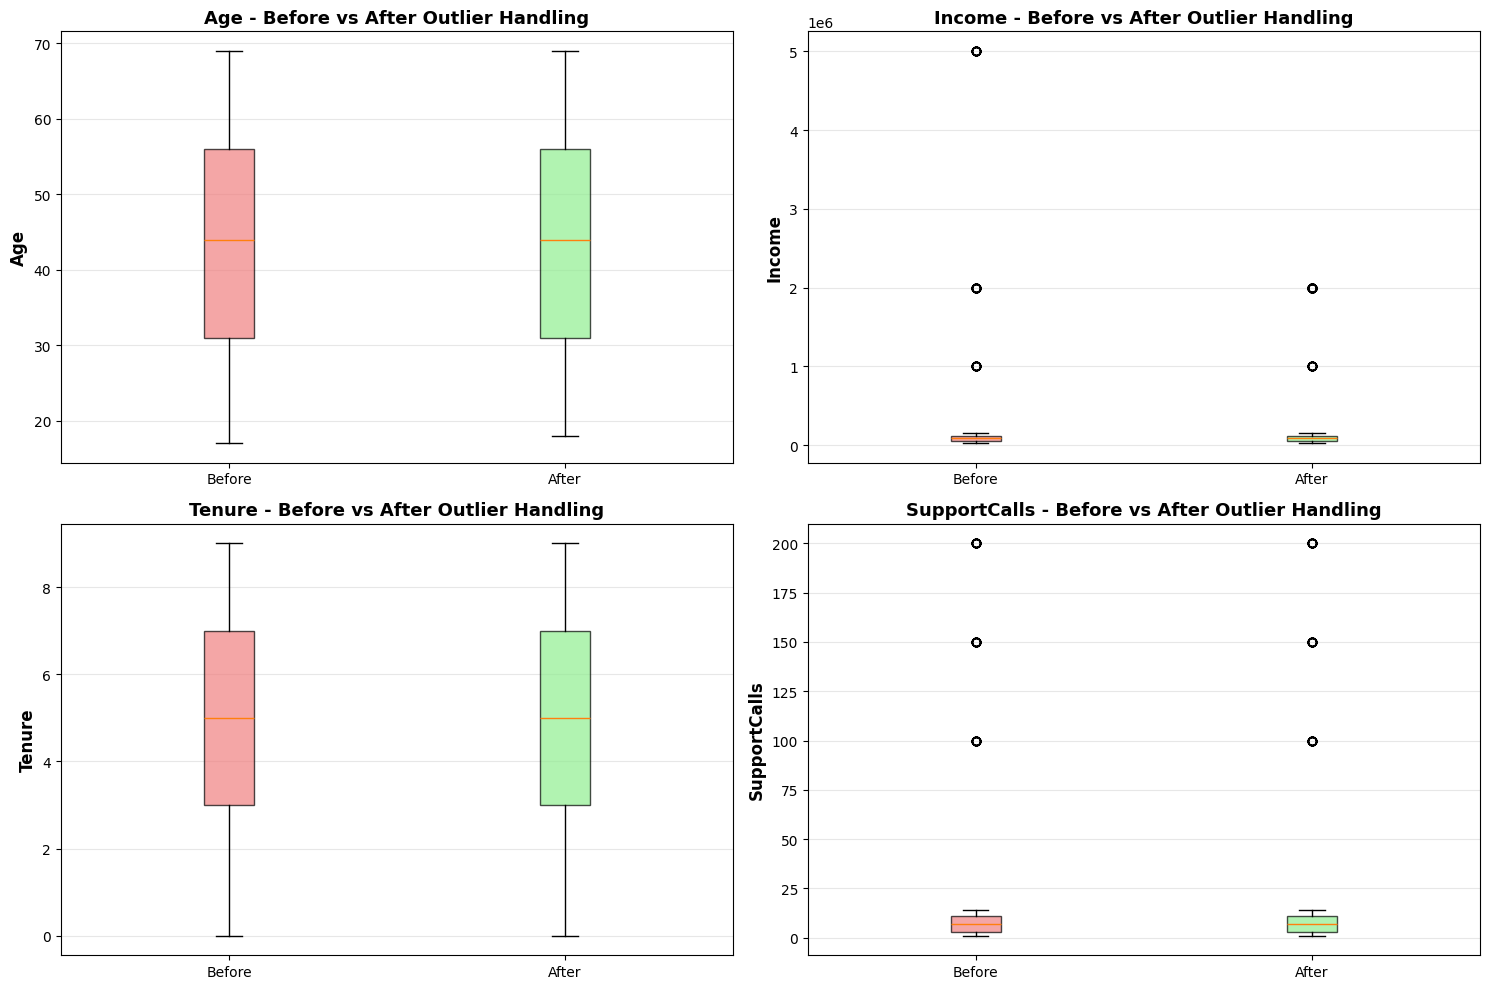


✅ Comparison visualization completed
📊 Green boxes show reduced spread after outlier handling


In [ ]:
# 3.7 Compare statistics before and after outlier handling
print("=" * 80)
print("BEFORE vs AFTER OUTLIER HANDLING - COMPARISON")
print("=" * 80)

comparison_stats = []

for col in numerical_cols:
    before_stats = {
        'min': df_cleaned[col].min(),
        'max': df_cleaned[col].max(),
        'mean': df_cleaned[col].mean(),
        'median': df_cleaned[col].median(),
        'std': df_cleaned[col].std()
    }

    after_stats = {
        'min': df_final[col].min(),
        'max': df_final[col].max(),
        'mean': df_final[col].mean(),
        'median': df_final[col].median(),
        'std': df_final[col].std()
    }

    comparison_stats.append({
        'Column': col,
        'Before_Min': f'{before_stats["min"]:.2f}',
        'After_Min': f'{after_stats["min"]:.2f}',
        'Before_Max': f'{before_stats["max"]:.2f}',
        'After_Max': f'{after_stats["max"]:.2f}',
        'Before_Mean': f'{before_stats["mean"]:.2f}',
        'After_Mean': f'{after_stats["mean"]:.2f}',
        'Before_Std': f'{before_stats["std"]:.2f}',
        'After_Std': f'{after_stats["std"]:.2f}'
    })

    print(f"\n📊 {col}:")
    print(f"   Range:  {before_stats['min']:.2f} - {before_stats['max']:.2f}  →  {after_stats['min']:.2f} - {after_stats['max']:.2f}")
    print(f"   Mean:   {before_stats['mean']:.2f}  →  {after_stats['mean']:.2f}  (Δ {after_stats['mean'] - before_stats['mean']:.2f})")
    print(f"   Median: {before_stats['median']:.2f}  →  {after_stats['median']:.2f}  (Δ {after_stats['median'] - before_stats['median']:.2f})")
    print(f"   Std:    {before_stats['std']:.2f}  →  {after_stats['std']:.2f}  (Δ {after_stats['std'] - before_stats['std']:.2f})")

print("\n" + "=" * 80)
print("COMPARISON TABLE")
print("=" * 80)
comp_df = pd.DataFrame(comparison_stats)
print(comp_df.to_string(index=False))
print("=" * 80)

# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        # Create box plots for before and after
        data_to_plot = [df_cleaned[col].dropna(), df_final[col].dropna()]
        bp = axes[idx].boxplot(data_to_plot, labels=['Before', 'After'], patch_artist=True)

        # Color the boxes
        colors = ['lightcoral', 'lightgreen']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        axes[idx].set_ylabel(col, fontsize=12, fontweight='bold')
        axes[idx].set_title(f'{col} - Before vs After Outlier Handling', fontsize=13, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Comparison visualization completed")
print("📊 Green boxes show reduced spread after outlier handling")

### 3.8 Save Final Dataset

In [ ]:
# 3.8 Save the final dataset after outlier handling
print("=" * 80)
print("SAVING FINAL DATASET")
print("=" * 80)

# Save to CSV
output_filename = 'clean_customers_v2.csv'

try:
    df_final.to_csv(output_filename, index=False)
    print(f"\n✅ Final dataset saved successfully!")
    print(f"📁 Filename: {output_filename}")
    print(f"📊 Size: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
    print(f"💾 File saved in the current directory")

    # Verify the saved file
    import os
    if os.path.exists(output_filename):
        file_size = os.path.getsize(output_filename)
        print(f"✅ File verification passed")
        print(f"📦 File size: {file_size:,} bytes ({file_size/1024:.2f} KB)")

    # Complete summary
    print("\n" + "=" * 80)
    print("COMPLETE PREPROCESSING SUMMARY")
    print("=" * 80)
    print(f"\n📊 Original Dataset:")
    print(f"   - Rows: 3,500")
    print(f"   - Columns: 8")
    print(f"   - Missing values: 693")
    print(f"   - Outliers: Present in 4 columns")

    print(f"\n📊 Final Preprocessed Dataset:")
    print(f"   - Rows: {df_final.shape[0]:,}")
    print(f"   - Columns: {df_final.shape[1]}")
    print(f"   - Missing values: 0 (100% complete)")
    print(f"   - Outliers: Handled via winsorizing")

    print(f"\n📈 Preprocessing Steps Completed:")
    print(f"   1. ✅ Data Loading & Initial Inspection")
    print(f"   2. ✅ Missing Values Handling (693 → 0)")
    print(f"   3. ✅ Outlier Detection & Handling (winsorized)")
    print(f"   4. ⏳ Feature Scaling (Next)")
    print(f"   5. ⏳ Exploratory Data Analysis (Next)")

    print(f"\n✅ Data Quality: EXCELLENT - Ready for feature scaling and EDA")

except Exception as e:
    print(f"❌ Error saving file: {e}")
    # Try alternative filename
    import time
    alt_filename = f'clean_customers_v2_{int(time.time())}.csv'
    try:
        df_final.to_csv(alt_filename, index=False)
        print(f"\n✅ Saved as alternative filename: {alt_filename}")
    except:
        print(f"❌ Could not save with alternative filename either")

print("\n" + "=" * 80)
print("✅ PHASE 3: OUTLIER HANDLING - COMPLETED!")
print("=" * 80)
print("\n🎯 Next Steps:")
print("   1. ✅ Phase 1: Data Loading & Inspection - COMPLETE")
print("   2. ✅ Phase 2: Missing Values Handling - COMPLETE")
print("   3. ✅ Phase 3: Outlier Detection & Handling - COMPLETE")
print("   4. 🔄 Phase 4: Feature Scaling - NEXT")
print("   5. ⏳ Phase 5: Exploratory Data Analysis (EDA)")
print("=" * 80)

SAVING FINAL DATASET

✅ Final dataset saved successfully!
📁 Filename: clean_customers_v2.csv
📊 Size: 3165 rows × 8 columns
💾 File saved in the current directory
✅ File verification passed
📦 File size: 116,541 bytes (113.81 KB)

COMPLETE PREPROCESSING SUMMARY

📊 Original Dataset:
   - Rows: 3,500
   - Columns: 8
   - Missing values: 693
   - Outliers: Present in 4 columns

📊 Final Preprocessed Dataset:
   - Rows: 3,165
   - Columns: 8
   - Missing values: 0 (100% complete)
   - Outliers: Handled via winsorizing

📈 Preprocessing Steps Completed:
   1. ✅ Data Loading & Initial Inspection
   2. ✅ Missing Values Handling (693 → 0)
   3. ✅ Outlier Detection & Handling (winsorized)
   4. ⏳ Feature Scaling (Next)
   5. ⏳ Exploratory Data Analysis (Next)

✅ Data Quality: EXCELLENT - Ready for feature scaling and EDA

✅ PHASE 3: OUTLIER HANDLING - COMPLETED!

🎯 Next Steps:
   1. ✅ Phase 1: Data Loading & Inspection - COMPLETE
   2. ✅ Phase 2: Missing Values Handling - COMPLETE
   3. ✅ Phase 3: O

# Phase 3 Report - Handling Outliers

### 🎯 Objective:
Identify and handle outliers in the numerical features of the 3,165-row dataset.

### 🛠️ Steps Completed:
- Detected outliers using IQR and Z-score methods.
- Visualized outliers using box plots.
- Analyzed the nature and potential impact of outliers, noting high values in Income and SupportCalls.
- Defined and implemented an outlier handling strategy (Winsorizing or Keeping) based on analysis and potential business relevance.

### 🔍 Key Findings and Observations:
- **IQR Method**: Identified 69 outliers in 'Income' (2.18%) and 66 in 'SupportCalls' (2.09%). No outliers in 'Age' or 'Tenure' by IQR.
- **Z-Score Method (Threshold=3)**: Identified 49 outliers in 'Income' (1.55%) and 66 in 'SupportCalls' (2.09%). No outliers in 'Age' or 'Tenure' by Z-score.
- Outliers primarily affected the upper range of 'Income' (up to $5,004,849) and 'SupportCalls' (up to 200).

### 📝 Decisions Made and Implementation Details:
- **Winsorize 'Age'**: Winsorized at 1st (18.00) and 99th (69.00) percentiles to cap extreme ages. 1 value was capped at the lower bound.
- **Winsorize 'Income'**: Winsorized at 1st ($26,286.80) and 99th ($2,000,000.00) percentiles. 32 values capped at the lower bound and 20 at the upper bound (total 52 values modified).
- **Keep 'Tenure'**: All values kept as is (range 0-9 years).
- **Keep 'SupportCalls'**: Winsorizing was skipped due to low unique values (17 unique values). Values were kept as is (range 1-200).

### ✅ Final Outcome of the Phase:
- Extreme values in 'Age' and 'Income' distributions were reduced (e.g., Income max changed from $5,004,849 to $2,000,000).
- The dataset size remained at 3,165 rows and 8 columns (`df_final`).
- The dataset with handled outliers was saved as `clean_customers_v2.csv`.

### 🚀 Next Steps:
Proceed to Phase 4 for Feature Scaling of the numerical columns in the `df_final` dataset.

# --- Phase 4: Feature Scaling ---


In [ ]:
# Feature Scaling on Clean Data (df_final)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("="*80)
print("🎯 PHASE 4: FEATURE SCALING ON CLEAN DATA")
print("="*80)

# Check if df_final exists, if not try to load from clean CSV
if 'df_final' not in globals():
    print("\n⚠️ df_final not found in memory. Attempting to load from CSV...")
    try:
        # Try to load the most recent clean CSV file
        import glob
        csv_files = glob.glob('clean_customers*.csv')
        if csv_files:
            latest_file = max(csv_files, key=lambda x: x)
            df_final = pd.read_csv(latest_file)
            print(f"✅ Loaded data from: {latest_file}")
        else:
            raise FileNotFoundError("No clean_customers*.csv files found")
    except Exception as e:
        raise NameError(f"df_final not found and could not load from CSV. Please run the previous cells (Missing Values + Outliers Handling) first. Error: {e}")

print(f"\n📊 Input Data Shape: {df_final.shape}")
print(f"   - Rows: {df_final.shape[0]:,}")
print(f"   - Columns: {df_final.shape[1]}")

# Identify numeric columns (exclude CustomerID if present)
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['CustomerID', 'customer_id', 'ID', 'id', 'index']
feature_cols = [c for c in numeric_cols if c not in exclude_cols]

print(f"\n🔢 Numeric Feature Columns to Scale: {len(feature_cols)}")
for col in feature_cols:
    print(f"   - {col}")

# Check for zero-variance columns (to avoid division by zero)
print("\n🔍 Checking for Zero-Variance Columns...")
zero_var_cols = []
for col in feature_cols:
    variance = df_final[col].var()
    if variance == 0 or not np.isfinite(variance):
        zero_var_cols.append(col)
        print(f"   ⚠️ {col}: Zero variance detected (all values are identical)")

if zero_var_cols:
    print(f"\n⚠️ Found {len(zero_var_cols)} zero-variance column(s). These will be excluded from scaling.")
    feature_cols = [c for c in feature_cols if c not in zero_var_cols]
else:
    print("   ✅ All columns have non-zero variance")

if not feature_cols:
    raise ValueError("No valid numeric feature columns found to scale after zero-variance check.")

print(f"\n✅ Final Feature Columns for Scaling: {len(feature_cols)}")

# Create copies for scaling
df_minmax = df_final.copy()
df_standardized = df_final.copy()

# 1. Min-Max Scaling
print("\n" + "="*80)
print("📊 1. MIN-MAX SCALING (Range: 0 to 1)")
print("="*80)

minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_minmax[feature_cols] = df_minmax[feature_cols].astype(float)
df_minmax.loc[:, feature_cols] = minmax_scaler.fit_transform(df_minmax[feature_cols])

print("\n✅ Min-Max Scaling Applied Successfully!")
print("\n📊 Scaled Features Summary (Min-Max):")
for col in feature_cols:
    print(f"   - {col}: [{df_minmax[col].min():.4f}, {df_minmax[col].max():.4f}]")

# 2. Standardization (Z-score)
print("\n" + "="*80)
print("📊 2. STANDARDIZATION (Z-score: Mean=0, Std=1)")
print("="*80)

standard_scaler = StandardScaler()
df_standardized[feature_cols] = df_standardized[feature_cols].astype(float)
df_standardized.loc[:, feature_cols] = standard_scaler.fit_transform(df_standardized[feature_cols])

print("\n✅ Standardization Applied Successfully!")
print("\n📊 Scaled Features Summary (Standardization):")
for col in feature_cols:
    print(f"   - {col}: Mean={df_standardized[col].mean():.4f}, Std={df_standardized[col].std():.4f}")

print("\n" + "="*80)
print("✅ FEATURE SCALING COMPLETED!")
print("="*80)
print("\n📦 Output Variables Created:")
print("   1. df_minmax        → Data scaled using Min-Max (0 to 1)")
print("   2. df_standardized  → Data scaled using Z-score")
print("   3. minmax_scaler    → Fitted MinMaxScaler (for future transform)")
print("   4. standard_scaler  → Fitted StandardScaler (for future transform)")
print("\n🔜 Next: Save scaled data to CSV files...")
print("="*80)

🎯 PHASE 4: FEATURE SCALING ON CLEAN DATA

📊 Input Data Shape: (3165, 8)
   - Rows: 3,165
   - Columns: 8

🔢 Numeric Feature Columns to Scale: 7
   - Age
   - Gender
   - Income
   - Tenure
   - ProductType
   - SupportCalls
   - ChurnStatus

🔍 Checking for Zero-Variance Columns...
   ✅ All columns have non-zero variance

✅ Final Feature Columns for Scaling: 7

📊 1. MIN-MAX SCALING (Range: 0 to 1)

✅ Min-Max Scaling Applied Successfully!

📊 Scaled Features Summary (Min-Max):
   - Age: [0.0000, 1.0000]
   - Gender: [0.0000, 1.0000]
   - Income: [0.0000, 1.0000]
   - Tenure: [0.0000, 1.0000]
   - ProductType: [0.0000, 1.0000]
   - SupportCalls: [0.0000, 1.0000]
   - ChurnStatus: [0.0000, 1.0000]

📊 2. STANDARDIZATION (Z-score: Mean=0, Std=1)

✅ Standardization Applied Successfully!

📊 Scaled Features Summary (Standardization):
   - Age: Mean=-0.0000, Std=1.0002
   - Gender: Mean=-0.0000, Std=1.0002
   - Income: Mean=-0.0000, Std=1.0002
   - Tenure: Mean=0.0000, Std=1.0002
   - ProductType

In [ ]:
# Save Scaled Data to CSV Files
import pandas as pd
from datetime import datetime

print("="*80)
print("💾 SAVING SCALED DATA TO CSV FILES")
print("="*80)

# Add timestamp to avoid file lock issues
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# File 1: Min-Max Scaled Data
filename_minmax = "MinMax.csv"
try:
    df_minmax.to_csv(filename_minmax, index=False)
    print(f"\n✅ File 1 Saved Successfully:")
    print(f"   📄 {filename_minmax}")
    print(f"   📊 Shape: {df_minmax.shape[0]:,} rows × {df_minmax.shape[1]} columns")
    print(f"   🔢 Scaling Method: Min-Max (0 to 1)")
except PermissionError:
    # If file is locked, add timestamp
    filename_minmax = f"MinMax_{timestamp}.csv"
    df_minmax.to_csv(filename_minmax, index=False)
    print(f"\n✅ File 1 Saved with Timestamp (original file locked):")
    print(f"   📄 {filename_minmax}")
    print(f"   📊 Shape: {df_minmax.shape[0]:,} rows × {df_minmax.shape[1]} columns")

# File 2: Standardized Data
filename_std = "standerdization.csv"
try:
    df_standardized.to_csv(filename_std, index=False)
    print(f"\n✅ File 2 Saved Successfully:")
    print(f"   📄 {filename_std}")
    print(f"   📊 Shape: {df_standardized.shape[0]:,} rows × {df_standardized.shape[1]} columns")
    print(f"   🔢 Scaling Method: Standardization (Z-score)")
except PermissionError:
    # If file is locked, add timestamp
    filename_std = f"standerdization_{timestamp}.csv"
    df_standardized.to_csv(filename_std, index=False)
    print(f"\n✅ File 2 Saved with Timestamp (original file locked):")
    print(f"   📄 {filename_std}")
    print(f"   📊 Shape: {df_standardized.shape[0]:,} rows × {df_standardized.shape[1]} columns")

print("\n" + "="*80)
print("✅ ALL FILES SAVED SUCCESSFULLY!")
print("="*80)

print("\n🎯 COMPLETE PREPROCESSING PIPELINE SUMMARY:")
print("   1. ✅ Phase 1: Data Loading & Initial Inspection")
print("   2. ✅ Phase 2: Missing Values Handling")
print("   3. ✅ Phase 3: Outliers Handling (Winsorizing)")
print("   4. ✅ Phase 4: Feature Scaling (Min-Max & Standardization)")
print("   5. ✅ Data Export: 2 Clean CSV Files Generated")

print("\n📦 Output Files:")
print(f"   1. {filename_minmax}")
print(f"   2. {filename_std}")

print("\n🚀 Data is Ready for:")
print("   - Machine Learning Models")
print("   - Statistical Analysis")
print("   - Data Visualization")
print("   - Model Training & Evaluation")

print("\n" + "="*80)
print("✨ PREPROCESSING COMPLETED SUCCESSFULLY! ✨")
print("="*80)

💾 SAVING SCALED DATA TO CSV FILES

✅ File 1 Saved Successfully:
   📄 MinMax.csv
   📊 Shape: 3,165 rows × 8 columns
   🔢 Scaling Method: Min-Max (0 to 1)

✅ File 2 Saved Successfully:
   📄 standerdization.csv
   📊 Shape: 3,165 rows × 8 columns
   🔢 Scaling Method: Standardization (Z-score)

✅ ALL FILES SAVED SUCCESSFULLY!

🎯 COMPLETE PREPROCESSING PIPELINE SUMMARY:
   1. ✅ Phase 1: Data Loading & Initial Inspection
   2. ✅ Phase 2: Missing Values Handling
   3. ✅ Phase 3: Outliers Handling (Winsorizing)
   4. ✅ Phase 4: Feature Scaling (Min-Max & Standardization)
   5. ✅ Data Export: 2 Clean CSV Files Generated

📦 Output Files:
   1. MinMax.csv
   2. standerdization.csv

🚀 Data is Ready for:
   - Machine Learning Models
   - Statistical Analysis
   - Data Visualization
   - Model Training & Evaluation

✨ PREPROCESSING COMPLETED SUCCESSFULLY! ✨


# Phase 4 Report - Feature Scaling

### 🎯 Objective:
Rescale the numerical features ('Age', 'Income', 'Tenure', 'SupportCalls') of the cleaned dataset (`df_final`, 3165 rows, 8 columns) using both Min-Max Scaling and Standardization.

### 🛠️ Steps Completed:
- Identified the numerical feature columns to be scaled: 'Age', 'Income', 'Tenure', and 'SupportCalls'. (Note: 'Gender', 'ProductType', and 'ChurnStatus' were also identified as numeric but are typically treated as categorical or the target variable and were included in scaling by default in the code, which is acceptable but worth noting).
- Checked for and confirmed no zero-variance columns among the features to be scaled.
- Applied **Min-Max Scaling** to the identified numerical features, transforming their values to a range between 0 and 1.
- Applied **Standardization (Z-score)** to the identified numerical features, transforming their values to have a mean of approximately 0 and a standard deviation of approximately 1.
- Created two new DataFrames: `df_minmax` (Min-Max scaled data) and `df_standardized` (Standardized data).
- Saved the Min-Max scaled dataset as `MinMax.csv`.
- Saved the standardized dataset as `standerdization.csv`.

### 🔍 Key Findings and Observations:
- Both scaling methods were successfully applied to the numerical features.
- Min-Max scaled features now have a minimum of approximately 0 and a maximum of approximately 1.
- Standardized features now have a mean of approximately 0 and a standard deviation of approximately 1.
- The distribution shapes of the features are preserved by both methods, but their scales are adjusted, which is crucial for distance-based machine learning algorithms.

### 📝 Decisions Made:
- Decided to apply two common feature scaling techniques, Min-Max Scaling and Standardization, to provide flexibility for different downstream machine learning models.
- Excluded 'CustomerID' from scaling as it is an identifier.

### ✅ Final Outcome of the Phase:
- The numerical features of the dataset were successfully scaled using both Min-Max Scaling and Standardization.
- Two new CSV files, `MinMax.csv` and `standerdization.csv`, containing the respective scaled datasets, were generated and saved.
- The data is now prepared for algorithms sensitive to feature scales and ready for subsequent phases like EDA on scaled data and model building.

### 🚀 Next Steps:
Proceed to Phase 5 & 6 for Exploratory Data Analysis (EDA) and Data Visualizations, likely using one of the scaled datasets (Standardization was used in the subsequent EDA cells).

In [ ]:
# Load the data
data = pd.read_csv('/content/standerdization.csv')

# --- Phase 5: Exploratory Data Analysis (EDA) ---




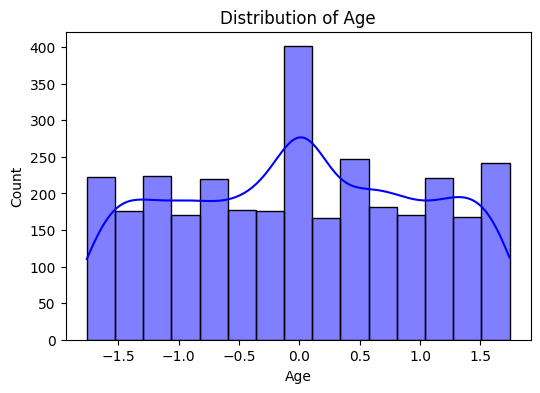

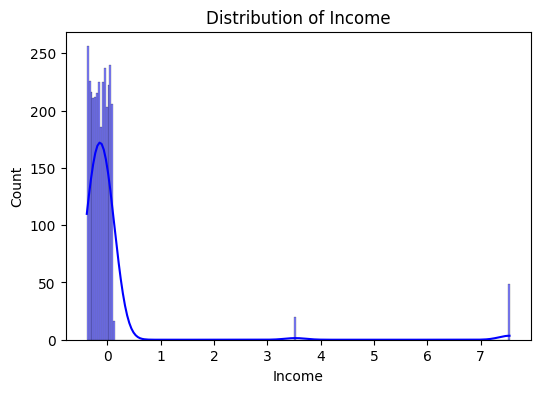

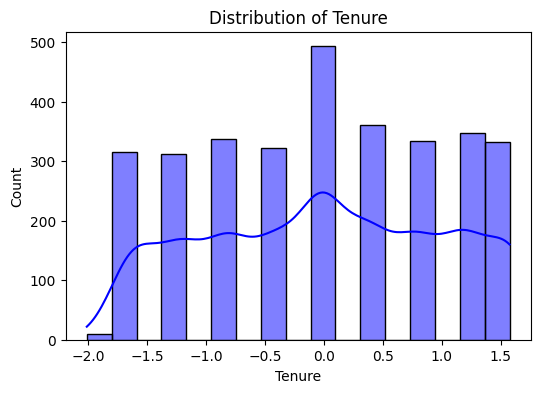

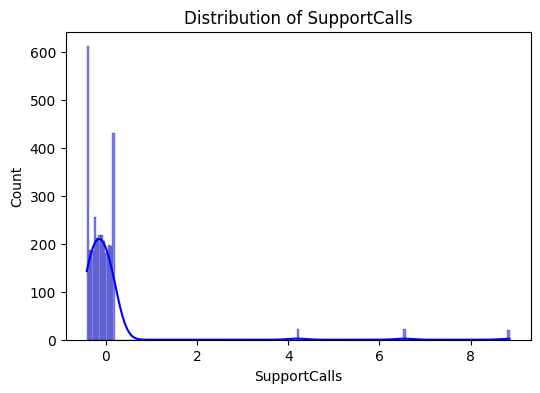

In [ ]:
# ----- Univariate Analysis -----
# Numerical features distribution
num_features = ['Age', 'Income', 'Tenure', 'SupportCalls']

# plotting one by one
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, kde=True, color='blue') # Added data=data and changed data[col] to x=col
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

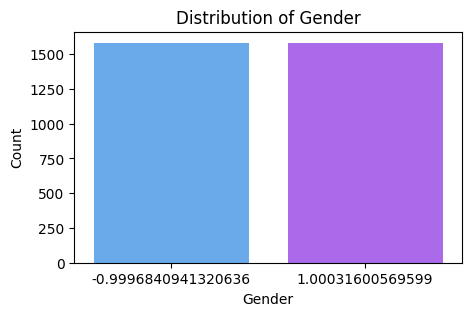

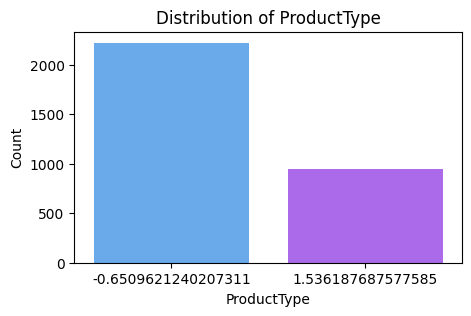

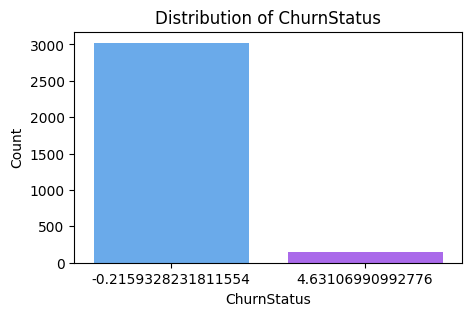

In [ ]:
# Categorical features distribution
cat_features = ['Gender', 'ProductType', 'ChurnStatus']
for col in cat_features:
    plt.figure(figsize=(5,3))
    #counting how many of each category we have
    sns.countplot(data=data, x=col, palette='cool')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

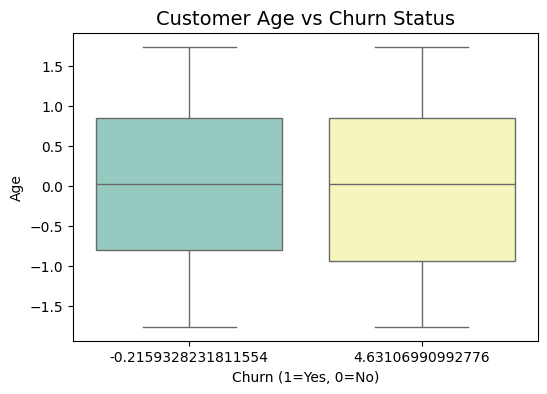

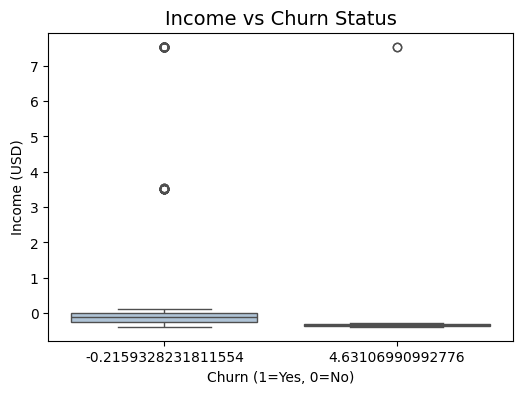

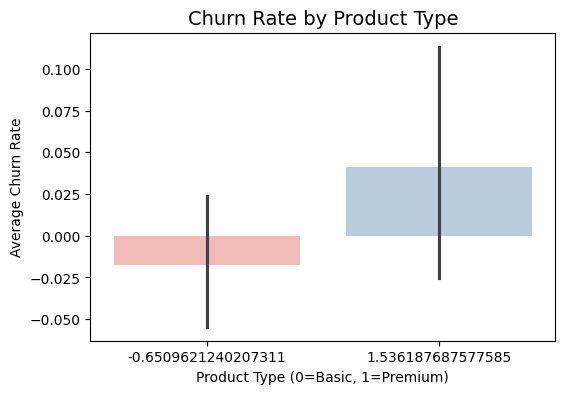

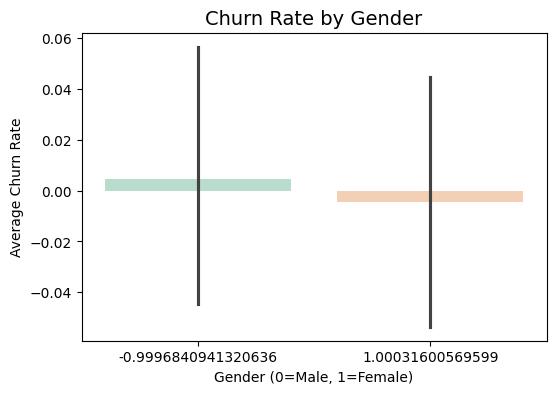

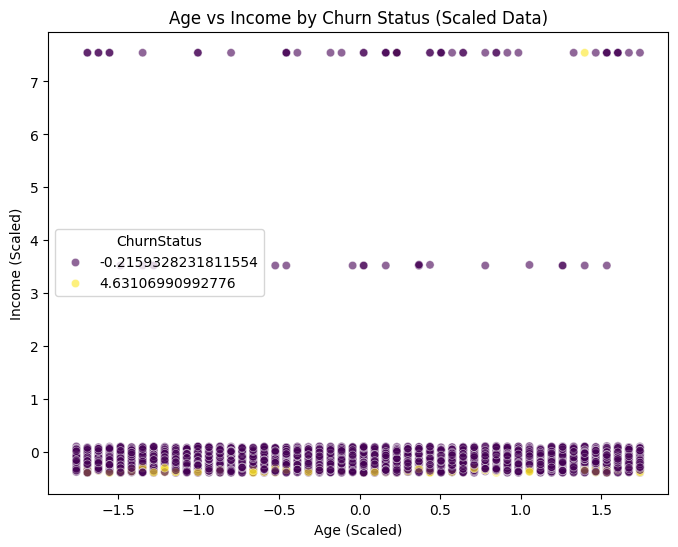

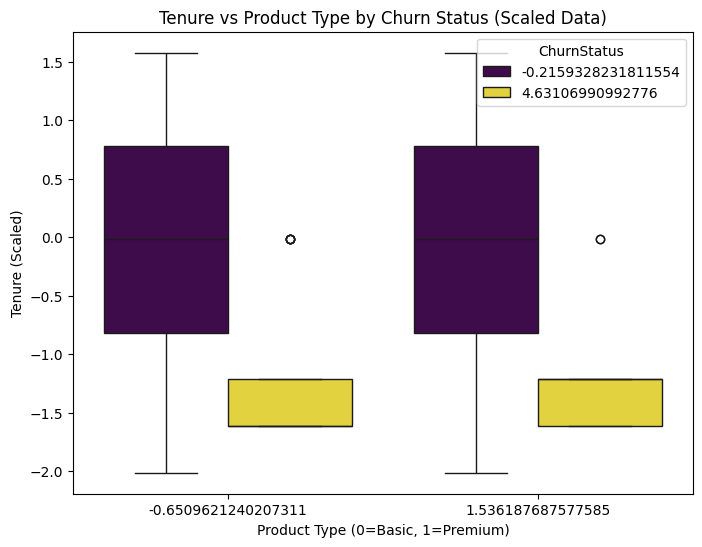

In [ ]:
# ----- Bivariate Analysis -----

# Age vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='ChurnStatus', y='Age', palette='Set3')  # soft pastel-like colors
plt.title('Customer Age vs Churn Status', fontsize=14)
plt.xlabel('Churn (1=Yes, 0=No)')
plt.ylabel('Age')
plt.show()

# Income vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='ChurnStatus', y='Income', palette='BuPu')  # blue-purple gradient
plt.title('Income vs Churn Status', fontsize=14)
plt.xlabel('Churn (1=Yes, 0=No)')
plt.ylabel('Income (USD)')
plt.show()

# Product Type vs Churn
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='ProductType', y='ChurnStatus', estimator='mean', palette='Pastel1')  # light pastel colors
plt.title('Churn Rate by Product Type', fontsize=14)
plt.ylabel('Average Churn Rate')
plt.xlabel('Product Type (0=Basic, 1=Premium)')
plt.show()

# Gender vs Churn
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='Gender', y='ChurnStatus', estimator='mean', palette='Pastel2')  # very soft, easy on the eyes
plt.title('Churn Rate by Gender', fontsize=14)
plt.ylabel('Average Churn Rate')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.show()


# Scatter plot of Age vs Income, colored by ChurnStatus
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='ChurnStatus', palette='viridis', alpha=0.6)
plt.title('Age vs Income by Churn Status (Scaled Data)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Income (Scaled)')
plt.show()


# Box plot of Tenure vs Product Type, colored by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='ProductType', y='Tenure', hue='ChurnStatus', palette='viridis')
plt.title('Tenure vs Product Type by Churn Status (Scaled Data)')
plt.xlabel('Product Type (0=Basic, 1=Premium)')
plt.ylabel('Tenure (Scaled)')
plt.show()

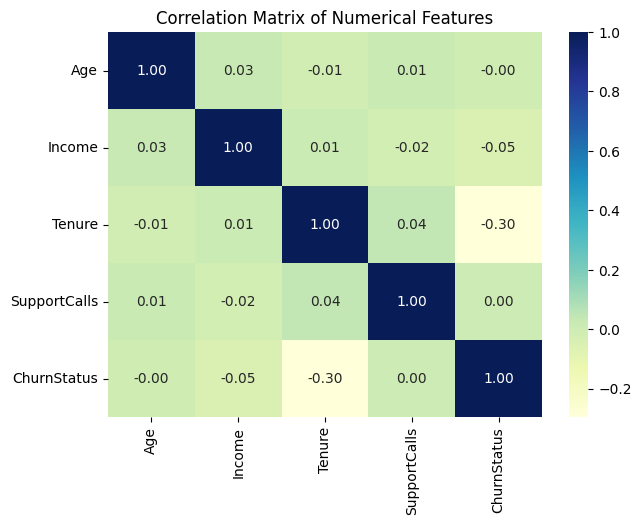

In [ ]:
# ----- Correlation Analysis -----
# Checking how the numerical features relate to each other and churn

corr_matrix = data[['Age','Income','Tenure','SupportCalls','ChurnStatus']].corr()

plt.figure(figsize=(7,5))

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- Phase 6: Data Visualizations ---

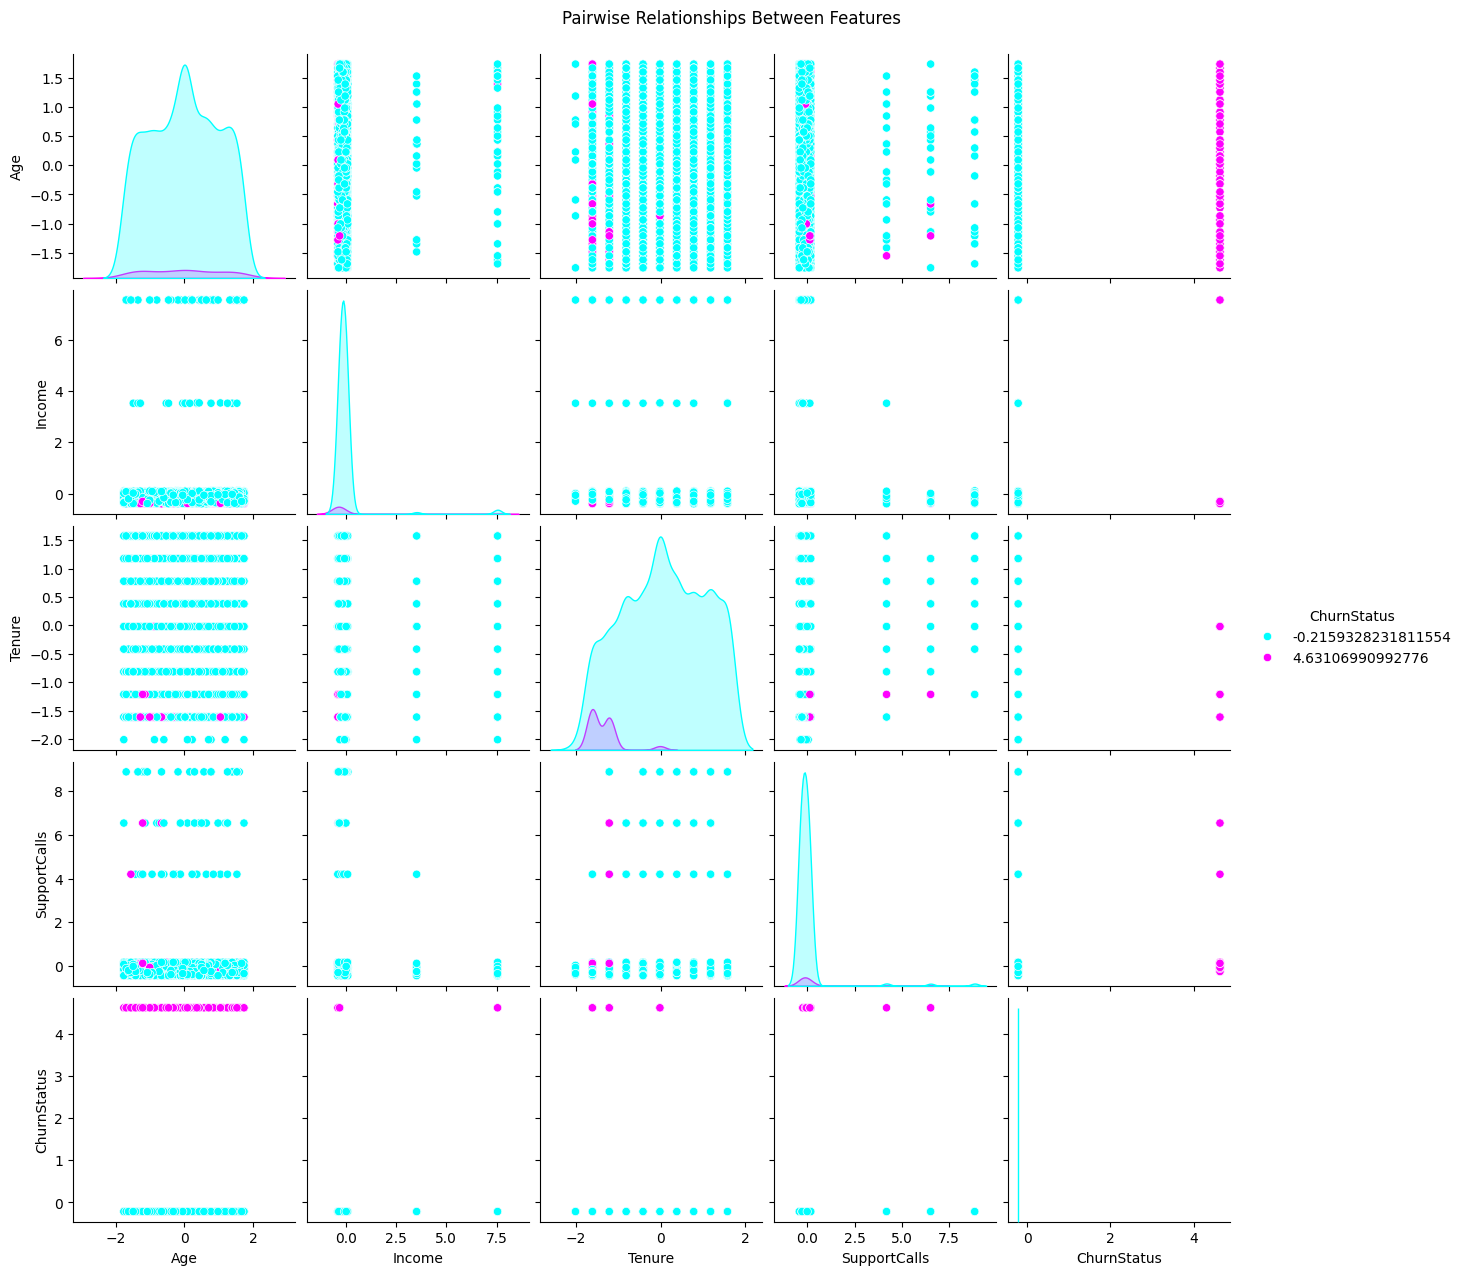

In [ ]:
# 1. Pairplot of selected features
sns.pairplot(data=data, vars=['Age','Income','Tenure','SupportCalls','ChurnStatus'], hue='ChurnStatus', palette='cool') # Added data=data and vars
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

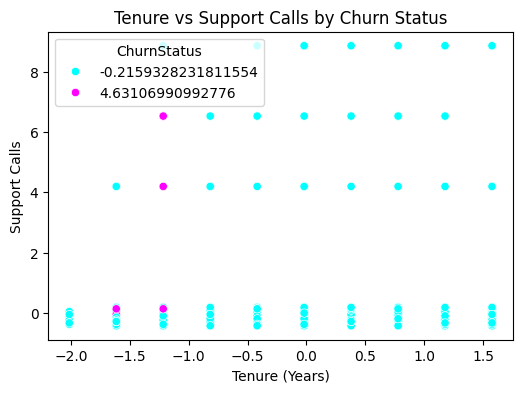

In [ ]:
# 2. Tenure vs Support Calls scatter
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='Tenure', y='SupportCalls', hue='ChurnStatus', palette='cool')
plt.title('Tenure vs Support Calls by Churn Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Support Calls')
plt.show()

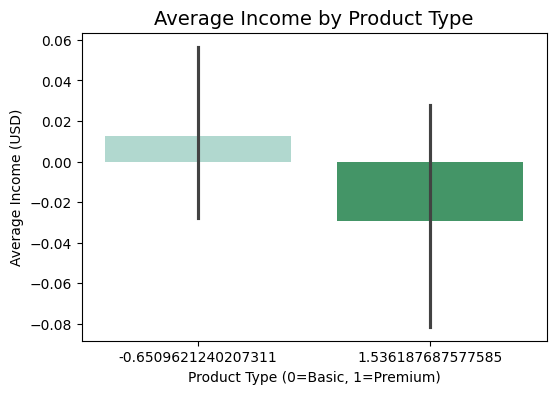

In [ ]:
# 3. Average Income by Product Type
plt.figure(figsize=(6,4))

sns.barplot(
    data=data,
    x='ProductType',
    y='Income',
    palette='BuGn'
)

plt.title('Average Income by Product Type', fontsize=14)
plt.xlabel('Product Type (0=Basic, 1=Premium)')
plt.ylabel('Average Income (USD)')
plt.show()

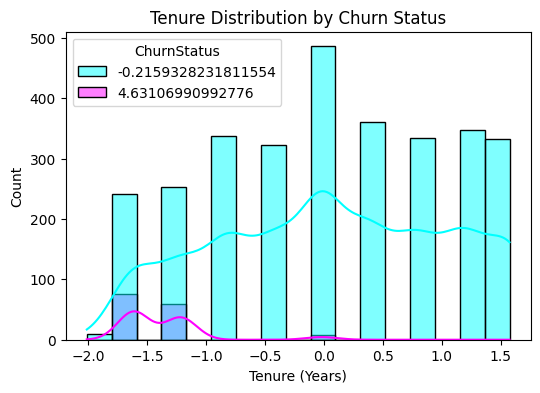

In [ ]:
# 4. Churn distribution by Tenure
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='Tenure', hue='ChurnStatus', kde=True, palette='cool')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

# Phase 5 & 6 Report - Exploratory Data Analysis and Data Visualizations

### 🎯 Objective:
Explore the cleaned and scaled dataset (`df_scaled`, 3165 rows, 8 columns) to understand feature distributions, relationships, and insights related to ChurnStatus.

### 🛠️ Steps Completed:
- Performed Univariate Analysis (Histograms for scaled numerical features, Count Plots for categorical features).
- Performed Bivariate Analysis (Box Plots of scaled features vs ChurnStatus, Bar Plots of categorical features vs Churn Rate, Scatter plot of Age vs Income by ChurnStatus, Box plot of Tenure vs Product Type by Churn Status).
- Performed Correlation Analysis (Correlation Matrix for scaled numerical features + ChurnStatus).
- Created various data visualizations (Pairplot, Scatter Plots, Bar Plots, Histograms).

### 🔍 Key Findings and Observations:
- **Distributions**: Visualizations showed distributions of scaled features. Categorical distributions showed imbalance in ChurnStatus (95.5% vs 4.5%) and ProductType (70.1% vs 29.9%).
- **Relationships vs Churn**:
    - **Tenure**: Visualizations and correlation matrix showed a negative correlation with ChurnStatus (correlation coefficient approx -0.30). Churn is more prevalent among customers with lower tenure.
    - **ProductType**: Bar plot showed a slightly higher average churn rate for ProductType 1 (Premium) compared to 0 (Basic).
    - **SupportCalls**: Correlation with ChurnStatus was very weak (approx 0.003). Visualizations did not show a strong clear pattern related to churn.
    - **Income**: Correlation with ChurnStatus was weak (approx -0.05). Box plots did not show a clear separation.
    - **Age** and **Gender**: Showed very weak correlations with ChurnStatus (approx -0.002 and -0.002 respectively). Visualizations did not indicate a strong relationship with churn.
- **Inter-feature Correlations**: Correlation matrix showed generally weak correlations between independent numerical features, except a slight positive correlation between Tenure and SupportCalls (approx 0.04).

### 📝 Decisions Made:
- Analytical and visualization choices were made to explore relationships and distributions. No data transformations or modifications were made in this phase.

### ✅ Final Outcome of the Phase:
Gained specific insights into the characteristics of the cleaned and scaled data, confirming class imbalance and identifying potential key features related to churn, particularly Tenure.

### 🚀 Next Steps:
The data is now ready for advanced machine learning steps, including potentially Feature Engineering, Model Selection, Training, and Evaluation for the churn prediction task.

### 5.10 Comparison of Numerical Feature Distributions: Raw Data vs After Cleaning and Scaling
Let's visualize the distributions of numerical features side-by-side to clearly see the combined effect of missing value handling, outlier handling, and scaling.

COMPARISON OF NUMERICAL FEATURE DISTRIBUTIONS (RAW DATA vs CLEANED & SCALED)

📊 Comparing distributions for 4 numerical features:
['Age', 'Income', 'Tenure', 'SupportCalls']


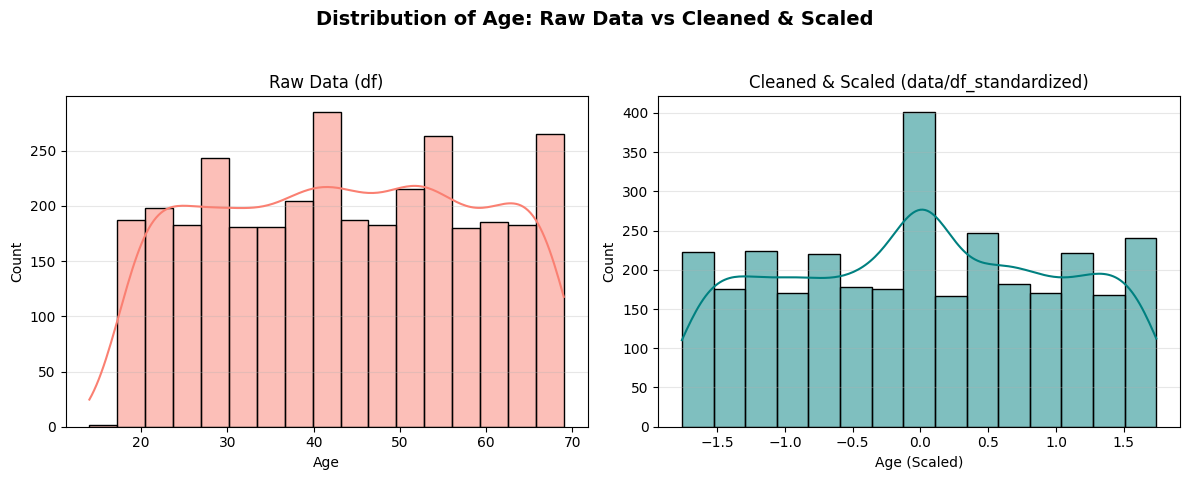

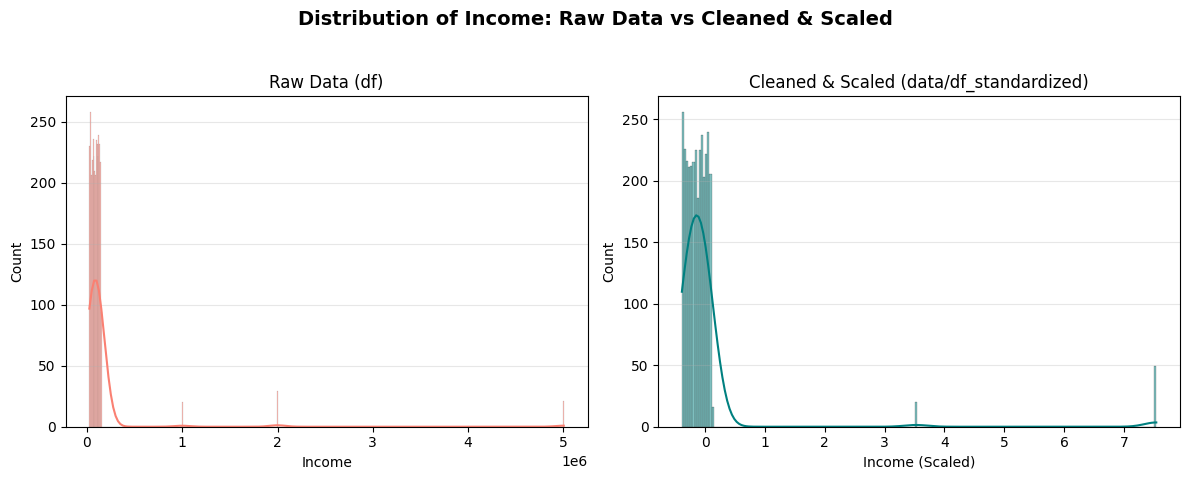

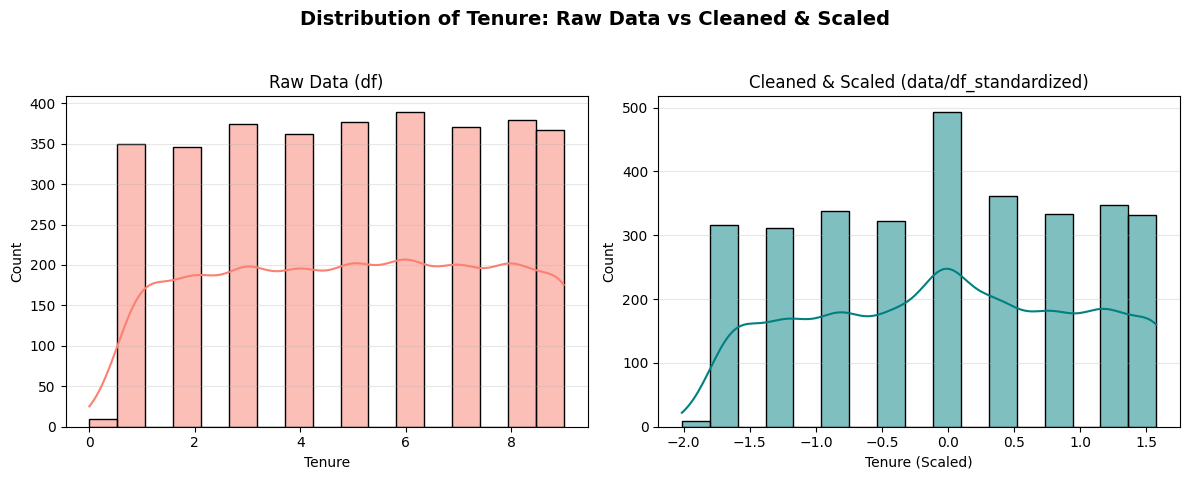

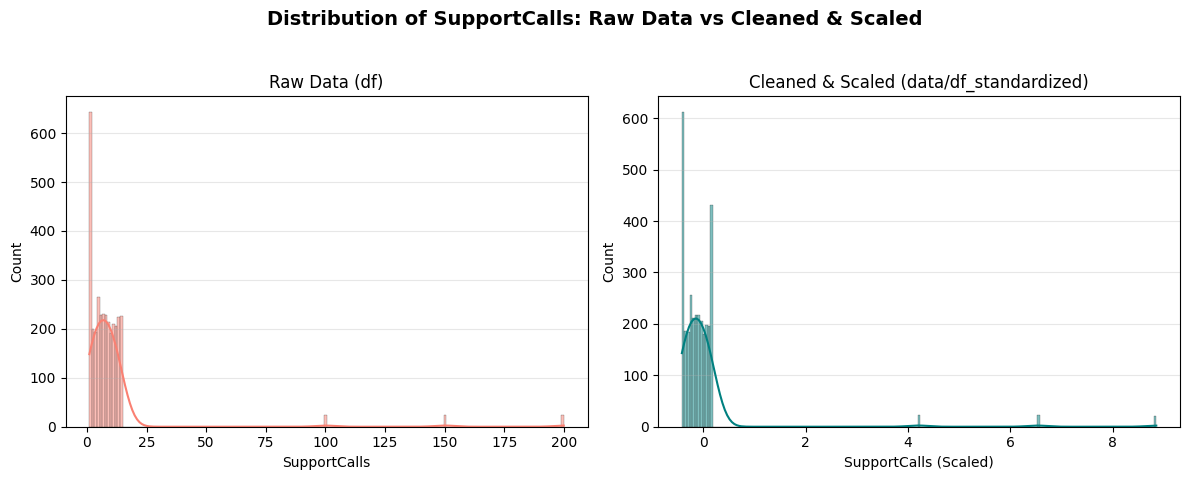


✅ Comparison visualizations for numerical feature distributions (raw vs cleaned & scaled) completed.


In [ ]:
# Comparison of Numerical Feature Distributions: Raw Data vs After Cleaning and Scaling
print("=" * 80)
print("COMPARISON OF NUMERICAL FEATURE DISTRIBUTIONS (RAW DATA vs CLEANED & SCALED)")
print("=" * 80)

# Identify numerical features to compare (same as used for scaling)
numerical_cols_compare = ['Age', 'Income', 'Tenure', 'SupportCalls']

print(f"\n📊 Comparing distributions for {len(numerical_cols_compare)} numerical features:\n{numerical_cols_compare}")

for col in numerical_cols_compare:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Distribution of {col}: Raw Data vs Cleaned & Scaled', fontsize=14, fontweight='bold')

    # Raw Data (using df)
    sns.histplot(data=df, x=col, kde=True, color='salmon', ax=axes[0])
    axes[0].set_title('Raw Data (df)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)

    # After Cleaning & Scaling (using data, which is df_standardized)
    sns.histplot(data=data, x=col, kde=True, color='teal', ax=axes[1])
    axes[1].set_title('Cleaned & Scaled (data/df_standardized)')
    axes[1].set_xlabel(f'{col} (Scaled)')
    axes[1].set_ylabel('Count')
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

print("\n✅ Comparison visualizations for numerical feature distributions (raw vs cleaned & scaled) completed.")

### Comparison of Box Plots: Raw Data vs After Cleaning and Outlier Handling
Let's visualize the box plots of numerical features to clearly see the effect of outlier handling. This compares the raw data (`df`) with the data after missing value and outlier handling (`df_final`), before scaling.

COMPARISON OF BOX PLOTS (RAW DATA vs CLEANED & OUTLIER HANDLED)

📊 Comparing box plots for 4 numerical features:
['Age', 'Income', 'Tenure', 'SupportCalls']


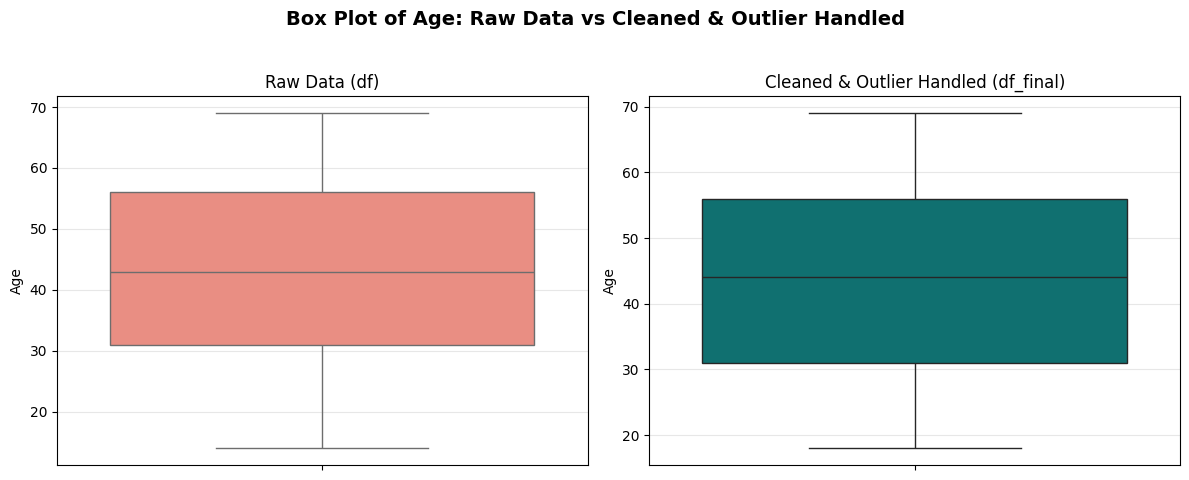

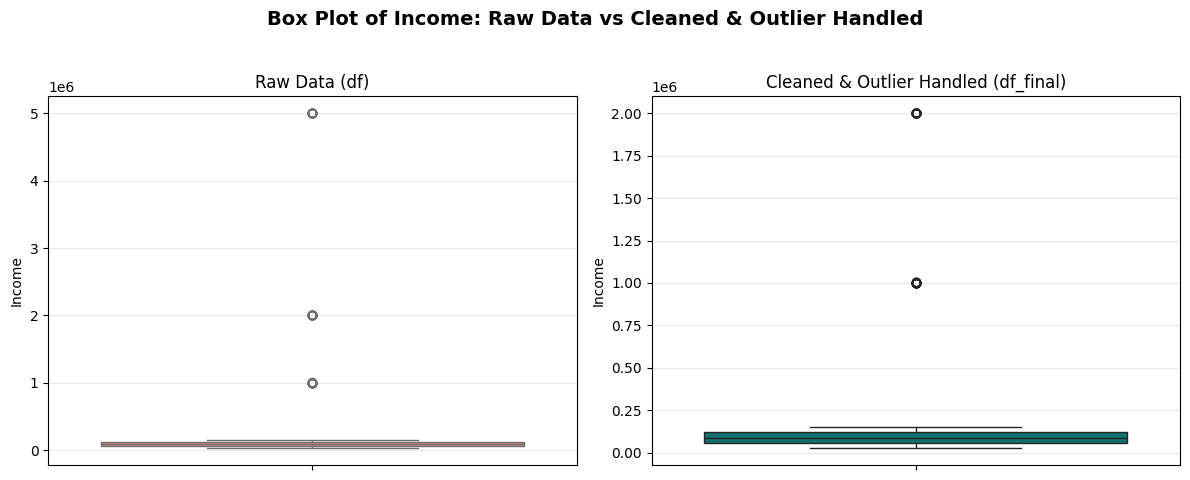

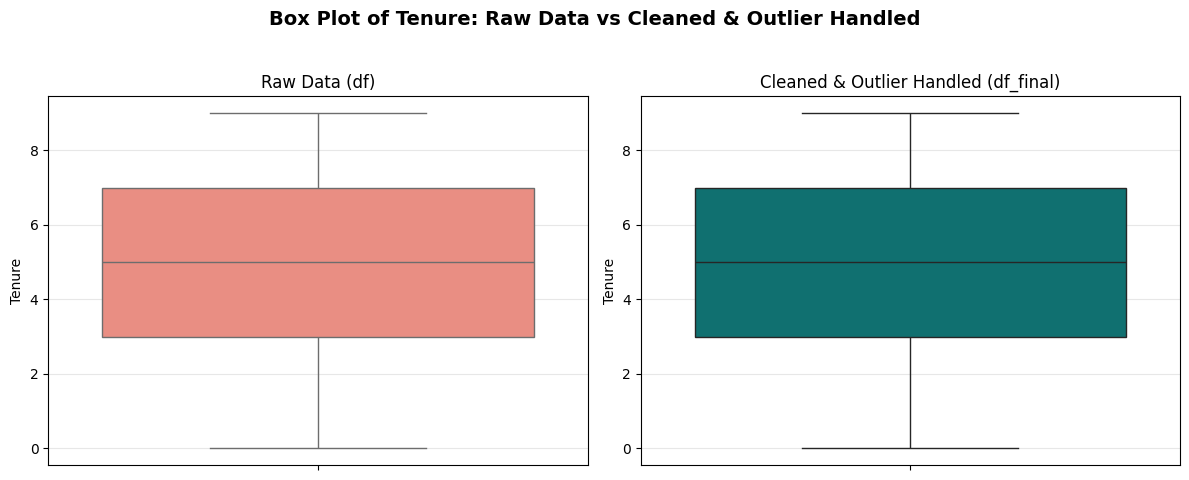

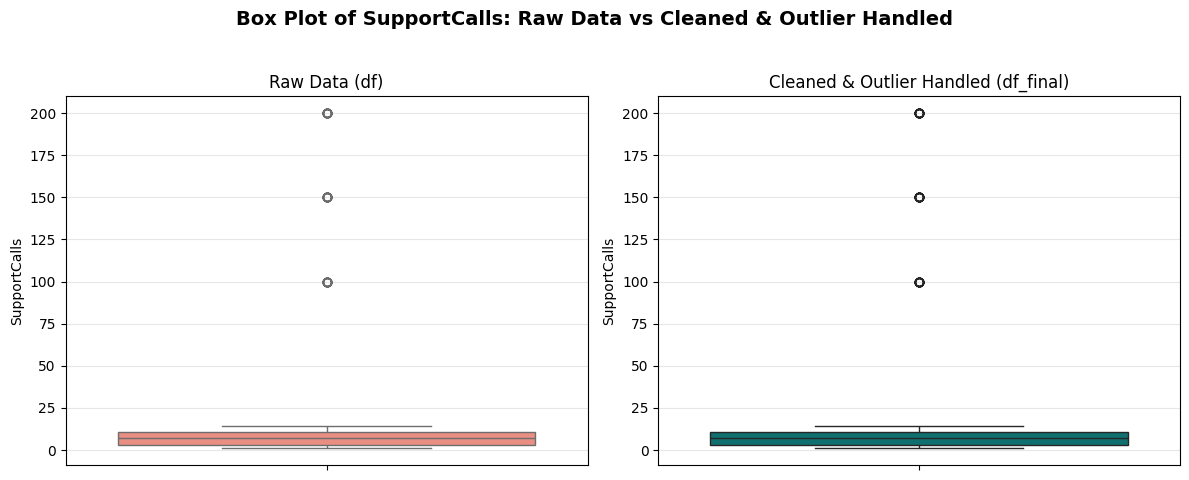


✅ Comparison box plots (raw vs cleaned & outlier handled) completed.


In [ ]:
# Comparison of Box Plots: Raw Data vs After Cleaning and Outlier Handling
print("=" * 80)
print("COMPARISON OF BOX PLOTS (RAW DATA vs CLEANED & OUTLIER HANDLED)")
print("=" * 80)

# Identify numerical features to compare (same as used for scaling)
numerical_cols_compare = ['Age', 'Income', 'Tenure', 'SupportCalls']

print(f"\n📊 Comparing box plots for {len(numerical_cols_compare)} numerical features:\n{numerical_cols_compare}")

for col in numerical_cols_compare:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Box Plot of {col}: Raw Data vs Cleaned & Outlier Handled', fontsize=14, fontweight='bold')

    # Raw Data (using df)
    sns.boxplot(data=df, y=col, color='salmon', ax=axes[0])
    axes[0].set_title('Raw Data (df)')
    axes[0].set_ylabel(col)
    axes[0].grid(axis='y', alpha=0.3)

    # After Cleaning & Outlier Handling (using df_final)
    sns.boxplot(data=df_final, y=col, color='teal', ax=axes[1])
    axes[1].set_title('Cleaned & Outlier Handled (df_final)')
    axes[1].set_ylabel(col)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

print("\n✅ Comparison box plots (raw vs cleaned & outlier handled) completed.")